Comparsion between the baseline and the new models 

Tuning of sensitivity / specificity

Statistical evaluation: Bootstrap confidence interval / T test

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
os.chdir('/content/gdrive/My Drive/final_files/classification/')
!ls

augment.py		       data	      model_evaluation.ipynb
classification_training.ipynb  drn_binary.py  __pycache__
classify_01_models	       evaluation.py  results
classify.py		       helpers.py


In [3]:
%matplotlib inline
from evaluation import threshold_tuning, test_evaluations


STEP 0. Set up configs for tuning threshold


In [ ]:
class tune_config:
    path_data = 'data/'
    arch = 'drn_c_26'
    workers = 4
    batch_size = 32
    print_freq = 10
    pretrained = 0
    crop_size = 224
    scale_size = 256
    results_path = 'results/'
    bootstrap_itr = 1000
    bootstrap_alpha = 0.05
    def __init__(self, weights, model_name):
        self.load_weights = weights
        self.model_name = model_name


STEP 1. Perform threshold tuning for each trained model. Save the best thresholds for later use on the test set

In [ ]:
# trained models ready for evaluation
weight_list = ['classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar', 
          'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'] 

# names of the models (for display results only)
model_names = ['Baseline', 'Aug_5', 'Aug_55', 'Aug_6', 'Aug_7', 'Aug_9']


=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 3.570 (3.570)	Loss 0.1124 (0.1124)	Sensitivity 0.500 (0.500)	Specificity 0.750 (0.750)	F1 0.522 (0.522)	Accuracy 0.656 (0.656)	
Val: [10/60]	Time 0.630 (0.901)	Loss 0.0285 (0.1003)	Sensitivity 0.889 (0.778)	Specificity 0.913 (0.858)	F1 0.842 (0.791)	Accuracy 0.906 (0.821)	
Val: [20/60]	Time 0.641 (0.777)	Loss 0.0436 (0.0872)	Sensitivity 0.867 (0.791)	Specificity 0.941 (0.866)	F1 0.897 (0.798)	Accuracy 0.906 (0.833)	
Val: [30/60]	Time 0.644 (0.732)	Loss 0.1240 (0.0894)	Sensitivity 0.500 (0.762)	Specificity 0.846 (0.859)	F1 0.462 (0.764)	Accuracy 0.781 (0.823)	
Val: [40/60]	Time 0.642 (0.709)	Loss 0.0565 (0.0850)	Sensitivity 0.800 (0.771)	Specificity 0.864 (0.862)	F1 0.762 (0.770)	Accuracy 0.844 (0.828)	
Val: [50/60]	Time 0.640 (0.696)	Loss 0.2026 (0.0871)	Sensitivity 0.571 (0.776)	Specificity 0.778 (0.864)	F1 0.615 (0.776)	Accuracy 0.688 (0.830)	
 * Sensitivity 0.774 Specificity 0.871 F1 0.777 Acc 0.834 ROC AUC 0.912


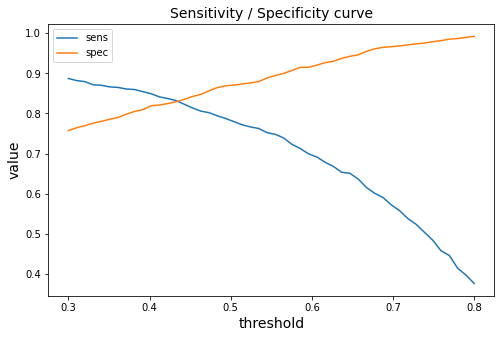

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.433
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.832
Confidence Interval: [0.806, 0.859]
-------------------------------------
Specificity: 
Mean: 0.829
Confidence Interval: [0.807, 0.851]
-------------------------------------
f1: 
Mean: 0.798
Confidence Interval: [0.777, 0.818]
-------------------------------------
auc: 
Mean: 0.912
Confidence Interval: [0.899, 0.925]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.783
Confidence Interval: [0.753, 0.815]
-------------------------------------
Specificity: 
Mean: 0.869
Confidence Interval: [0.850, 0.888]
-------------------------------------


/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.394 (1.394)	Loss 0.0218 (0.0218)	Sensitivity 1.000 (1.000)	Specificity 0.905 (0.905)	F1 0.917 (0.917)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.624 (0.701)	Loss 0.0246 (0.0444)	Sensitivity 0.900 (0.876)	Specificity 0.818 (0.832)	F1 0.783 (0.792)	Accuracy 0.844 (0.847)	
Val: [20/60]	Time 0.634 (0.669)	Loss 0.0630 (0.0477)	Sensitivity 0.833 (0.870)	Specificity 0.800 (0.828)	F1 0.769 (0.809)	Accuracy 0.812 (0.842)	
Val: [30/60]	Time 0.631 (0.658)	Loss 0.0604 (0.0453)	Sensitivity 0.909 (0.879)	Specificity 0.714 (0.822)	F1 0.741 (0.809)	Accuracy 0.781 (0.843)	
Val: [40/60]	Time 0.637 (0.652)	Loss 0.0188 (0.0443)	Sensitivity 0.923 (0.884)	Specificity 0.947 (0.807)	F1 0.923 (0.803)	Accuracy 0.938 (0.838)	
Val: [50/60]	Time 0.631 (0.648)	Loss 0.0291 (0.0458)	Sensitivity 0.889 (0.878)	Specificity 0.857 (0.809)	F1 0.889 (0.804)	Accuracy 0.875 (0.838)	
 * Sensitivity 0.879 Specificity 0.817 F1 0.810 Acc 0.842 ROC AUC 0.925


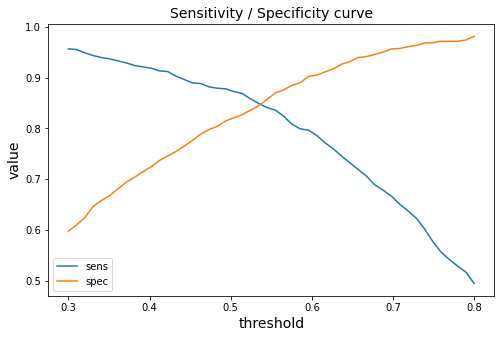

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.849
Confidence Interval: [0.826, 0.873]
-------------------------------------
Specificity: 
Mean: 0.844
Confidence Interval: [0.823, 0.866]
-------------------------------------
f1: 
Mean: 0.816
Confidence Interval: [0.794, 0.836]
-------------------------------------
auc: 
Mean: 0.925
Confidence Interval: [0.914, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.877
Confidence Interval: [0.853, 0.899]
-------------------------------------
Specificity: 
Mean: 0.818
Confidence Interval: [0.798, 0.841]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.329 (1.329)	Loss 0.0380 (0.0380)	Sensitivity 1.000 (1.000)	Specificity 0.611 (0.611)	F1 0.800 (0.800)	Accuracy 0.781 (0.781)	
Val: [10/60]	Time 0.640 (0.696)	Loss 0.0141 (0.0380)	Sensitivity 1.000 (0.871)	Specificity 1.000 (0.809)	F1 1.000 (0.783)	Accuracy 1.000 (0.835)	
Val: [20/60]	Time 0.632 (0.666)	Loss 0.0896 (0.0387)	Sensitivity 0.812 (0.878)	Specificity 0.750 (0.816)	F1 0.788 (0.806)	Accuracy 0.781 (0.845)	
Val: [30/60]	Time 0.636 (0.655)	Loss 0.0172 (0.0409)	Sensitivity 1.000 (0.885)	Specificity 0.900 (0.815)	F1 0.923 (0.801)	Accuracy 0.938 (0.844)	
Val: [40/60]	Time 0.630 (0.649)	Loss 0.1007 (0.0447)	Sensitivity 0.867 (0.889)	Specificity 0.824 (0.820)	F1 0.839 (0.813)	Accuracy 0.844 (0.848)	
Val: [50/60]	Time 0.630 (0.646)	Loss 0.0557 (0.0450)	Sensitivity 0.769 (0.888)	Specificity 0.842 (0.821)	F1 0.769 (0.815)	Accuracy 0.812 (0.849)	
 * Sensitivity 0.890 Specificity 0.825 F1 0.821 Acc 0.852 ROC AUC 0.934


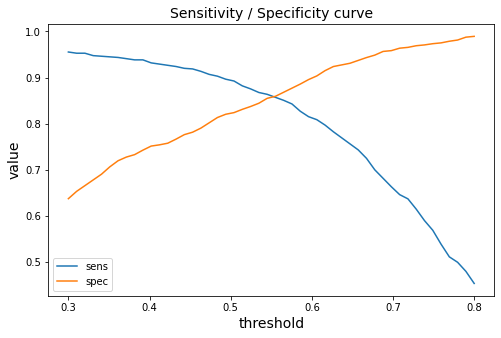

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.555
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.857
Confidence Interval: [0.833, 0.881]
-------------------------------------
Specificity: 
Mean: 0.860
Confidence Interval: [0.839, 0.880]
-------------------------------------
f1: 
Mean: 0.830
Confidence Interval: [0.808, 0.850]
-------------------------------------
auc: 
Mean: 0.934
Confidence Interval: [0.923, 0.945]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.896
Confidence Interval: [0.874, 0.918]
-------------------------------------
Specificity: 
Mean: 0.823
Confidence Interval: [0.801, 0.846]
-------------------------------------
f1: 

/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.379 (1.379)	Loss 0.0450 (0.0450)	Sensitivity 0.667 (0.667)	Specificity 0.783 (0.783)	F1 0.600 (0.600)	Accuracy 0.750 (0.750)	
Val: [10/60]	Time 0.632 (0.699)	Loss 0.0314 (0.0450)	Sensitivity 0.900 (0.845)	Specificity 0.909 (0.829)	F1 0.857 (0.806)	Accuracy 0.906 (0.838)	
Val: [20/60]	Time 0.628 (0.667)	Loss 0.0367 (0.0444)	Sensitivity 0.929 (0.858)	Specificity 0.944 (0.824)	F1 0.929 (0.816)	Accuracy 0.938 (0.839)	
Val: [30/60]	Time 0.628 (0.656)	Loss 0.0474 (0.0405)	Sensitivity 0.833 (0.864)	Specificity 0.750 (0.830)	F1 0.741 (0.814)	Accuracy 0.781 (0.846)	
Val: [40/60]	Time 0.637 (0.652)	Loss 0.0485 (0.0402)	Sensitivity 0.923 (0.874)	Specificity 0.737 (0.816)	F1 0.800 (0.809)	Accuracy 0.812 (0.840)	
Val: [50/60]	Time 0.634 (0.648)	Loss 0.0331 (0.0408)	Sensitivity 0.900 (0.869)	Specificity 0.909 (0.817)	F1 0.857 (0.806)	Accuracy 0.906 (0.837)	
 * Sensitivity 0.875 Specificity 0.819 F1 0.812 Acc 0.841 ROC AUC 0.925


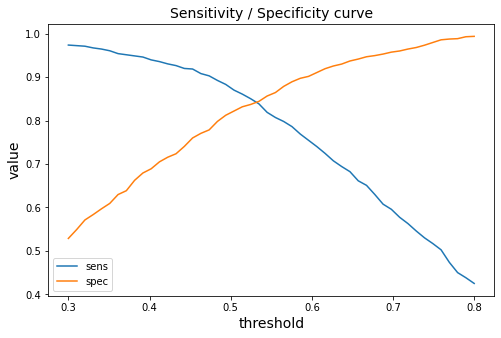

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.838
Confidence Interval: [0.812, 0.863]
-------------------------------------
Specificity: 
Mean: 0.844
Confidence Interval: [0.824, 0.863]
-------------------------------------
f1: 
Mean: 0.811
Confidence Interval: [0.790, 0.830]
-------------------------------------
auc: 
Mean: 0.925
Confidence Interval: [0.913, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.876
Confidence Interval: [0.852, 0.900]
-------------------------------------
Specificity: 
Mean: 0.818
Confidence Interval: [0.796, 0.842]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.323 (1.323)	Loss 0.0352 (0.0352)	Sensitivity 0.929 (0.929)	Specificity 0.722 (0.722)	F1 0.812 (0.812)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.628 (0.697)	Loss 0.0568 (0.0489)	Sensitivity 0.929 (0.900)	Specificity 0.722 (0.773)	F1 0.812 (0.804)	Accuracy 0.812 (0.824)	
Val: [20/60]	Time 0.635 (0.666)	Loss 0.0296 (0.0426)	Sensitivity 0.909 (0.909)	Specificity 0.810 (0.807)	F1 0.800 (0.828)	Accuracy 0.844 (0.848)	
Val: [30/60]	Time 0.635 (0.656)	Loss 0.0834 (0.0502)	Sensitivity 0.929 (0.891)	Specificity 0.889 (0.791)	F1 0.897 (0.802)	Accuracy 0.906 (0.830)	
Val: [40/60]	Time 0.634 (0.650)	Loss 0.0278 (0.0474)	Sensitivity 0.800 (0.890)	Specificity 0.818 (0.801)	F1 0.727 (0.802)	Accuracy 0.812 (0.835)	
Val: [50/60]	Time 0.635 (0.647)	Loss 0.0281 (0.0496)	Sensitivity 1.000 (0.885)	Specificity 0.765 (0.799)	F1 0.882 (0.808)	Accuracy 0.875 (0.833)	
 * Sensitivity 0.875 Specificity 0.800 F1 0.802 Acc 0.833 ROC AUC 0.919


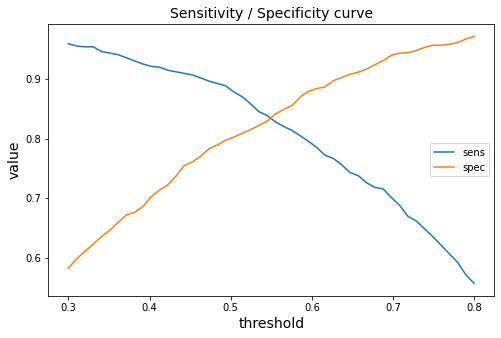

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.545
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.839
Confidence Interval: [0.813, 0.865]
-------------------------------------
Specificity: 
Mean: 0.829
Confidence Interval: [0.808, 0.851]
-------------------------------------
f1: 
Mean: 0.802
Confidence Interval: [0.781, 0.823]
-------------------------------------
auc: 
Mean: 0.919
Confidence Interval: [0.907, 0.931]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.880
Confidence Interval: [0.856, 0.902]
-------------------------------------
Specificity: 
Mean: 0.800
Confidence Interval: [0.775, 0.823]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.401 (1.401)	Loss 0.0394 (0.0394)	Sensitivity 0.857 (0.857)	Specificity 0.889 (0.889)	F1 0.857 (0.857)	Accuracy 0.875 (0.875)	
Val: [10/60]	Time 0.638 (0.699)	Loss 0.0549 (0.0428)	Sensitivity 0.812 (0.878)	Specificity 0.750 (0.803)	F1 0.788 (0.812)	Accuracy 0.781 (0.832)	
Val: [20/60]	Time 0.636 (0.668)	Loss 0.0396 (0.0408)	Sensitivity 0.923 (0.887)	Specificity 0.737 (0.798)	F1 0.800 (0.802)	Accuracy 0.812 (0.830)	
Val: [30/60]	Time 0.636 (0.657)	Loss 0.0257 (0.0413)	Sensitivity 0.909 (0.884)	Specificity 0.857 (0.786)	F1 0.833 (0.795)	Accuracy 0.875 (0.824)	
Val: [40/60]	Time 0.619 (0.651)	Loss 0.0319 (0.0427)	Sensitivity 0.909 (0.876)	Specificity 0.762 (0.789)	F1 0.769 (0.790)	Accuracy 0.812 (0.821)	
Val: [50/60]	Time 0.633 (0.647)	Loss 0.0339 (0.0415)	Sensitivity 0.875 (0.880)	Specificity 0.875 (0.791)	F1 0.778 (0.797)	Accuracy 0.875 (0.825)	
 * Sensitivity 0.877 Specificity 0.798 F1 0.799 Acc 0.829 ROC AUC 0.920


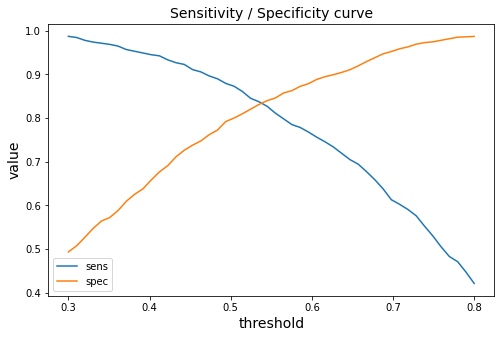

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.838
Confidence Interval: [0.812, 0.863]
-------------------------------------
Specificity: 
Mean: 0.830
Confidence Interval: [0.808, 0.852]
-------------------------------------
f1: 
Mean: 0.801
Confidence Interval: [0.778, 0.823]
-------------------------------------
auc: 
Mean: 0.920
Confidence Interval: [0.908, 0.931]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.877
Confidence Interval: [0.852, 0.899]
-------------------------------------
Specificity: 
Mean: 0.796
Confidence Interval: [0.773, 0.820]
-------------------------------------
f1: 
M

In [ ]:
# iteratively for each model, find best threshold so that sens and spec are close enough
# save the best thresholds for evaluation on the test set

t_list = []
for i in range(len(weight_list)):
    wi = weight_list[i]
    model = model_names[i]
    conf = tune_config(wi, model)
    # finding best threshold for a given model
    # print bootstrap results on the validation data
    best_t = threshold_tuning(conf)
    t_list.append(best_t)

print('best thresholds: ', t_list)

STEP 2. Apply the best thresholds on the test data and print bootstrap resmapling results for all models

In [ ]:
# bootstrap iterations
itr = 1000
# metrics
metrics = ['sen', 'spe', 'auc', 'f1']
# confidence interval alpha
alpha = 0.05
results_path = 'results/'
# t_list from STEP 1. 
t_list = [0.433, 0.535, 0.555, 0.535, 0.545, 0.535]

In [ ]:
# print bootstrap results on the test data
te_best = test_evaluations(weight_list, t_list, metrics, model_names, results_path, itr, alpha)
te_best.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 3.530 (3.530)	Loss 0.0166 (0.0166)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.807 (1.850)	Loss 0.0206 (0.0206)	Accuracy 0.812 (0.869)	
Test: [20/59]	Time 0.625 (2.668)	Loss 0.0152 (0.0177)	Accuracy 0.938 (0.890)	
Test: [30/59]	Time 8.487 (3.506)	Loss 0.0052 (0.0174)	Accuracy 0.969 (0.886)	
Test: [40/59]	Time 1.454 (3.428)	Loss 0.0357 (0.0362)	Accuracy 0.938 (0.877)	
Test: [50/59]	Time 0.625 (3.771)	Loss 0.1090 (0.0545)	Accuracy 0.812 (0.859)	
 * Acc 0.849 ROC AUC 0.924
=> loading checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 41)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.294 (1.294)	Loss 0.0215 (0.0215)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.634 (0.694)	Loss 0.0260 (0.0239)	Accuracy 0.812 (0.855)	
Test: [20/59]	Time 0.632 (0.666)	Loss 0.0184 (0.0231)	Accuracy 0.875 (0.871)	
Test: [30/59]	Time 0.628 (0.656)	Loss 0.0176 (0.0266)	Accuracy 0.875 (0.842)	
Test: [40/59]	Time 0.631 (0.650)	Loss 0.0561 (0.0321)	Accuracy 0.875 (0.842)	
Test: [50/59]	Time 0.636 (0.646)	Loss 0.0253 (0.0354)	Accuracy 0.938 (0.853)	
 * Acc 0.860 ROC AUC 0.940
=> loading checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 38)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.327 (1.327)	Loss 0.0204 (0.0204)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.636 (0.696)	Loss 0.0210 (0.0248)	Accuracy 0.844 (0.818)	
Test: [20/59]	Time 0.621 (0.664)	Loss 0.0151 (0.0203)	Accuracy 0.906 (0.857)	
Test: [30/59]	Time 0.631 (0.653)	Loss 0.0173 (0.0232)	Accuracy 0.844 (0.836)	
Test: [40/59]	Time 0.632 (0.648)	Loss 0.0563 (0.0312)	Accuracy 0.875 (0.838)	
Test: [50/59]	Time 0.631 (0.644)	Loss 0.0313 (0.0369)	Accuracy 0.906 (0.849)	
 * Acc 0.855 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.383 (1.383)	Loss 0.0220 (0.0220)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.630 (0.700)	Loss 0.0246 (0.0232)	Accuracy 0.875 (0.875)	
Test: [20/59]	Time 0.625 (0.666)	Loss 0.0140 (0.0201)	Accuracy 0.906 (0.885)	
Test: [30/59]	Time 0.631 (0.654)	Loss 0.0228 (0.0243)	Accuracy 0.812 (0.845)	
Test: [40/59]	Time 0.628 (0.649)	Loss 0.0428 (0.0289)	Accuracy 0.938 (0.847)	
Test: [50/59]	Time 0.633 (0.645)	Loss 0.0497 (0.0328)	Accuracy 0.875 (0.857)	
 * Acc 0.860 ROC AUC 0.941
=> loading checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 52)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.396 (1.396)	Loss 0.0252 (0.0252)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.631 (0.701)	Loss 0.0371 (0.0324)	Accuracy 0.688 (0.838)	
Test: [20/59]	Time 0.624 (0.667)	Loss 0.0175 (0.0277)	Accuracy 0.906 (0.871)	
Test: [30/59]	Time 0.632 (0.656)	Loss 0.0159 (0.0344)	Accuracy 0.812 (0.821)	
Test: [40/59]	Time 0.633 (0.650)	Loss 0.0669 (0.0394)	Accuracy 0.875 (0.824)	
Test: [50/59]	Time 0.630 (0.645)	Loss 0.0269 (0.0423)	Accuracy 0.938 (0.838)	
 * Acc 0.847 ROC AUC 0.929
=> loading checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 63)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.295 (1.295)	Loss 0.0311 (0.0311)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.633 (0.689)	Loss 0.0244 (0.0273)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.633 (0.661)	Loss 0.0185 (0.0237)	Accuracy 0.938 (0.860)	
Test: [30/59]	Time 0.620 (0.651)	Loss 0.0159 (0.0285)	Accuracy 0.906 (0.828)	
Test: [40/59]	Time 0.633 (0.646)	Loss 0.0301 (0.0334)	Accuracy 0.906 (0.827)	
Test: [50/59]	Time 0.626 (0.643)	Loss 0.0222 (0.0352)	Accuracy 0.969 (0.843)	


  0%|          | 2/1000 [00:00<00:50, 19.63it/s]

 * Acc 0.853 ROC AUC 0.936


100%|██████████| 1000/1000 [00:48<00:00, 20.45it/s]

Model:  Baseline
Metric:  sen
*******************
Mean:  0.8323451339104124
Confidence Interval: [0.803, 0.859]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean:  0.8588112826568272
Confidence Interval: [0.839, 0.879]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean:  0.9238571914334746
Confidence Interval: [0.911, 0.935]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean:  0.8149883325423404
Confidence Interval: [0.794, 0.835]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean:  0.8656382951995376
Confidence Interval: [0.841, 0.890]
----------------------------------------------
---------------------

t, p value of model baseline compared with model Aug_5
t: 65.27349581698837
p: 0.0
************************************************************


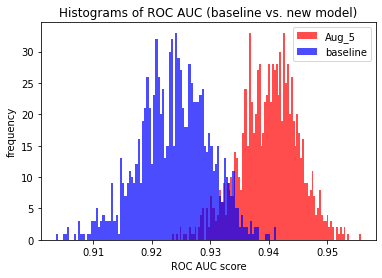

t, p value of model baseline compared with model Aug_55
t: 58.066559335154345
p: 0.0
************************************************************


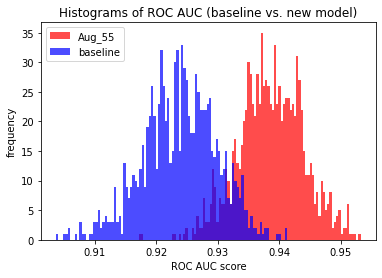

t, p value of model baseline compared with model Aug_6
t: 69.45654712046313
p: 0.0
************************************************************


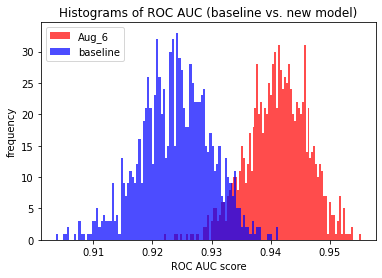

t, p value of model baseline compared with model Aug_7
t: 20.121965669163544
p: 1.9406261116756288e-82
************************************************************


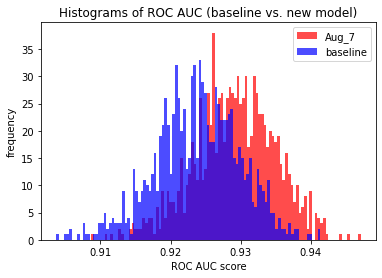

t, p value of model baseline compared with model Aug_9
t: 46.54083469558791
p: 1.196e-320
************************************************************


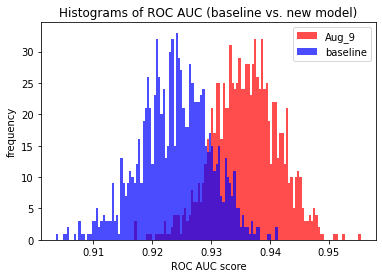

In [ ]:
# T test of ROC AUC and histograms of ROC AUC for all new models (compared with the baseline)
# p value << 0.05 shows that the differences between the AUC scores are statistically signficant
te_best.t_test()

STEP 3. Apply default threshold on the test data and print bootstrap results for all models

In [ ]:
# default threshold = 0.5
default_t_list = [0.5] * 6
te_default = test_evaluations(weight_list, default_t_list, metrics, model_names, results_path, itr, alpha)
te_default.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.342 (1.342)	Loss 0.0166 (0.0166)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.643 (0.702)	Loss 0.0206 (0.0206)	Accuracy 0.812 (0.869)	
Test: [20/59]	Time 0.641 (0.672)	Loss 0.0152 (0.0177)	Accuracy 0.938 (0.890)	
Test: [30/59]	Time 0.634 (0.661)	Loss 0.0052 (0.0174)	Accuracy 0.969 (0.886)	
Test: [40/59]	Time 0.635 (0.656)	Loss 0.0357 (0.0362)	Accuracy 0.938 (0.877)	
Test: [50/59]	Time 0.638 (0.652)	Loss 0.1090 (0.0545)	Accuracy 0.812 (0.859)	
 * Acc 0.849 ROC AUC 0.924
=> loading checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 41)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.359 (1.359)	Loss 0.0215 (0.0215)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.627 (0.701)	Loss 0.0260 (0.0239)	Accuracy 0.812 (0.855)	
Test: [20/59]	Time 0.632 (0.668)	Loss 0.0184 (0.0231)	Accuracy 0.875 (0.871)	
Test: [30/59]	Time 0.635 (0.656)	Loss 0.0176 (0.0266)	Accuracy 0.875 (0.842)	
Test: [40/59]	Time 0.624 (0.650)	Loss 0.0561 (0.0321)	Accuracy 0.875 (0.842)	
Test: [50/59]	Time 0.627 (0.646)	Loss 0.0253 (0.0354)	Accuracy 0.938 (0.853)	
 * Acc 0.860 ROC AUC 0.940
=> loading checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 38)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.381 (1.381)	Loss 0.0204 (0.0204)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.631 (0.699)	Loss 0.0210 (0.0248)	Accuracy 0.844 (0.818)	
Test: [20/59]	Time 0.621 (0.666)	Loss 0.0151 (0.0203)	Accuracy 0.906 (0.857)	
Test: [30/59]	Time 0.634 (0.655)	Loss 0.0173 (0.0232)	Accuracy 0.844 (0.836)	
Test: [40/59]	Time 0.623 (0.649)	Loss 0.0563 (0.0312)	Accuracy 0.875 (0.838)	
Test: [50/59]	Time 0.629 (0.644)	Loss 0.0313 (0.0369)	Accuracy 0.906 (0.849)	
 * Acc 0.855 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.250 (1.250)	Loss 0.0220 (0.0220)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.618 (0.686)	Loss 0.0246 (0.0232)	Accuracy 0.875 (0.875)	
Test: [20/59]	Time 0.628 (0.661)	Loss 0.0140 (0.0201)	Accuracy 0.906 (0.885)	
Test: [30/59]	Time 0.630 (0.651)	Loss 0.0228 (0.0243)	Accuracy 0.812 (0.845)	
Test: [40/59]	Time 0.627 (0.645)	Loss 0.0428 (0.0289)	Accuracy 0.938 (0.847)	
Test: [50/59]	Time 0.637 (0.642)	Loss 0.0497 (0.0328)	Accuracy 0.875 (0.857)	
 * Acc 0.860 ROC AUC 0.941
=> loading checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 52)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.401 (1.401)	Loss 0.0252 (0.0252)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.622 (0.701)	Loss 0.0371 (0.0324)	Accuracy 0.688 (0.838)	
Test: [20/59]	Time 0.625 (0.666)	Loss 0.0175 (0.0277)	Accuracy 0.906 (0.871)	
Test: [30/59]	Time 0.635 (0.655)	Loss 0.0159 (0.0344)	Accuracy 0.812 (0.821)	
Test: [40/59]	Time 0.630 (0.649)	Loss 0.0669 (0.0394)	Accuracy 0.875 (0.824)	
Test: [50/59]	Time 0.633 (0.645)	Loss 0.0269 (0.0423)	Accuracy 0.938 (0.838)	
 * Acc 0.847 ROC AUC 0.929
=> loading checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 63)


/content/gdrive/My Drive/final_files/classification/evaluation.py:319: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.483 (1.483)	Loss 0.0311 (0.0311)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.631 (0.709)	Loss 0.0244 (0.0273)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.632 (0.672)	Loss 0.0185 (0.0237)	Accuracy 0.938 (0.860)	
Test: [30/59]	Time 0.624 (0.658)	Loss 0.0159 (0.0285)	Accuracy 0.906 (0.828)	
Test: [40/59]	Time 0.634 (0.652)	Loss 0.0301 (0.0334)	Accuracy 0.906 (0.827)	
Test: [50/59]	Time 0.629 (0.647)	Loss 0.0222 (0.0352)	Accuracy 0.969 (0.843)	


  0%|          | 3/1000 [00:00<00:47, 20.80it/s]

 * Acc 0.853 ROC AUC 0.936


100%|██████████| 1000/1000 [00:49<00:00, 20.23it/s]


Model:  Baseline
Metric:  sen
*******************
Mean:  0.7935097729149794
Confidence Interval: [0.765, 0.823]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean:  0.886073840304765
Confidence Interval: [0.866, 0.904]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean:  0.9234917263578855
Confidence Interval: [0.912, 0.935]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean:  0.8084696811401683
Confidence Interval: [0.788, 0.828]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean:  0.8946958697651687
Confidence Interval: [0.871, 0.917]
----------------------------------------------
----------------------

Additional experiments:

use auc as metric to save best model

In [ ]:
class tune_config:
    path_data = 'data/'
    arch = 'drn_c_26'
    workers = 4
    batch_size = 32
    print_freq = 10
    pretrained = 0
    crop_size = 224
    scale_size = 256
    results_path = 'results/auc/'
    bootstrap_itr = 1000
    bootstrap_alpha = 0.05
    def __init__(self, weights, model_name):
        self.load_weights = weights
        self.model_name = model_name


In [ ]:
# trained models ready for evaluation
weight_list = ['classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar', 
          'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200716-1520_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'] 

# names of the models (for display results only)
model_names = ['Baseline', 'Aug_5', 'Aug_55', 'Aug_6', 'Aug_7', 'Aug_8', 'Aug_9']


=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 18.904 (18.904)	Loss 0.0540 (0.0540)	Sensitivity 0.818 (0.818)	Specificity 0.762 (0.762)	F1 0.720 (0.720)	Accuracy 0.781 (0.781)	
Val: [10/60]	Time 0.608 (4.647)	Loss 0.0459 (0.0374)	Sensitivity 0.933 (0.904)	Specificity 0.765 (0.780)	F1 0.848 (0.813)	Accuracy 0.844 (0.830)	
Val: [20/60]	Time 13.853 (4.669)	Loss 0.0411 (0.0391)	Sensitivity 1.000 (0.903)	Specificity 0.533 (0.745)	F1 0.829 (0.783)	Accuracy 0.781 (0.811)	
Val: [30/60]	Time 0.581 (4.213)	Loss 0.0224 (0.0386)	Sensitivity 1.000 (0.904)	Specificity 0.792 (0.741)	F1 0.762 (0.780)	Accuracy 0.844 (0.806)	
Val: [40/60]	Time 13.745 (4.307)	Loss 0.0520 (0.0411)	Sensitivity 0.900 (0.895)	Specificity 0.727 (0.735)	F1 0.720 (0.771)	Accuracy 0.781 (0.800)	
Val: [50/60]	Time 0.572 (4.086)	Loss 0.0359 (0.0402)	Sensitivity 0.941 (0.896)	Specificity 0.800 (0.741)	F1 0.889 (0.775)	Accuracy 0.875 (0.804)	
 * Sensitivity 0.898 Specificity 0.738 F1 0.775 Acc 0.802 ROC AUC 0.920


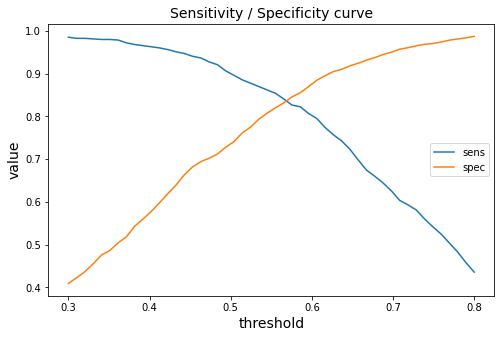

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.841
Confidence Interval: [0.814, 0.867]
-------------------------------------
Specificity: 
Mean: 0.831
Confidence Interval: [0.808, 0.852]
-------------------------------------
f1: 
Mean: 0.804
Confidence Interval: [0.783, 0.825]
-------------------------------------
auc: 
Mean: 0.920
Confidence Interval: [0.907, 0.931]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.900
Confidence Interval: [0.880, 0.919]
-------------------------------------
Specificity: 
Mean: 0.735
Confidence Interval: [0.708, 0.760]
-------------------------------------


/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.232 (1.232)	Loss 0.0165 (0.0165)	Sensitivity 0.923 (0.923)	Specificity 0.947 (0.947)	F1 0.923 (0.923)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.577 (0.639)	Loss 0.0638 (0.0414)	Sensitivity 0.667 (0.886)	Specificity 0.750 (0.776)	F1 0.640 (0.781)	Accuracy 0.719 (0.815)	
Val: [20/60]	Time 0.588 (0.610)	Loss 0.0284 (0.0409)	Sensitivity 0.857 (0.873)	Specificity 0.889 (0.807)	F1 0.857 (0.799)	Accuracy 0.875 (0.829)	
Val: [30/60]	Time 0.580 (0.601)	Loss 0.0612 (0.0408)	Sensitivity 0.824 (0.883)	Specificity 0.867 (0.807)	F1 0.848 (0.804)	Accuracy 0.844 (0.833)	
Val: [40/60]	Time 0.576 (0.596)	Loss 0.0265 (0.0399)	Sensitivity 0.867 (0.892)	Specificity 0.882 (0.809)	F1 0.867 (0.816)	Accuracy 0.875 (0.839)	
Val: [50/60]	Time 0.590 (0.594)	Loss 0.0479 (0.0402)	Sensitivity 0.923 (0.893)	Specificity 0.737 (0.808)	F1 0.800 (0.814)	Accuracy 0.812 (0.839)	
 * Sensitivity 0.897 Specificity 0.797 F1 0.811 Acc 0.834 ROC AUC 0.926


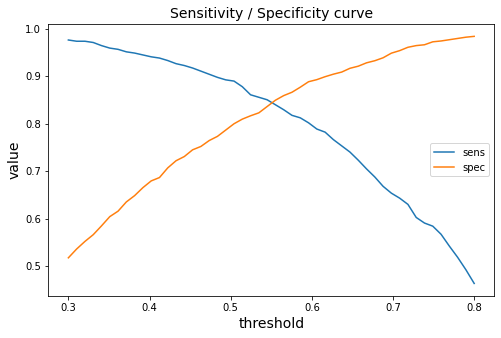

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.555
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.840
Confidence Interval: [0.815, 0.865]
-------------------------------------
Specificity: 
Mean: 0.849
Confidence Interval: [0.827, 0.870]
-------------------------------------
f1: 
Mean: 0.814
Confidence Interval: [0.794, 0.835]
-------------------------------------
auc: 
Mean: 0.926
Confidence Interval: [0.915, 0.937]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.892
Confidence Interval: [0.871, 0.913]
-------------------------------------
Specificity: 
Mean: 0.796
Confidence Interval: [0.771, 0.819]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.403 (1.403)	Loss 0.0151 (0.0151)	Sensitivity 1.000 (1.000)	Specificity 0.882 (0.882)	F1 0.937 (0.937)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.571 (0.659)	Loss 0.0285 (0.0403)	Sensitivity 1.000 (0.901)	Specificity 0.625 (0.760)	F1 0.842 (0.830)	Accuracy 0.812 (0.827)	
Val: [20/60]	Time 0.584 (0.625)	Loss 0.0183 (0.0394)	Sensitivity 1.000 (0.905)	Specificity 0.900 (0.771)	F1 0.923 (0.824)	Accuracy 0.938 (0.830)	
Val: [30/60]	Time 0.582 (0.613)	Loss 0.0288 (0.0381)	Sensitivity 0.909 (0.900)	Specificity 0.905 (0.780)	F1 0.870 (0.814)	Accuracy 0.906 (0.832)	
Val: [40/60]	Time 0.589 (0.608)	Loss 0.0369 (0.0390)	Sensitivity 0.818 (0.893)	Specificity 0.762 (0.772)	F1 0.720 (0.799)	Accuracy 0.781 (0.822)	
Val: [50/60]	Time 0.593 (0.605)	Loss 0.0253 (0.0390)	Sensitivity 1.000 (0.901)	Specificity 0.714 (0.768)	F1 0.786 (0.798)	Accuracy 0.812 (0.822)	
 * Sensitivity 0.906 Specificity 0.758 F1 0.797 Acc 0.819 ROC AUC 0.929


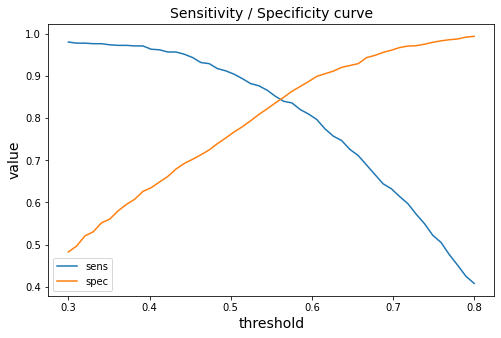

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.840
Confidence Interval: [0.813, 0.863]
-------------------------------------
Specificity: 
Mean: 0.850
Confidence Interval: [0.828, 0.870]
-------------------------------------
f1: 
Mean: 0.814
Confidence Interval: [0.793, 0.835]
-------------------------------------
auc: 
Mean: 0.929
Confidence Interval: [0.917, 0.940]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.906
Confidence Interval: [0.885, 0.926]
-------------------------------------
Specificity: 
Mean: 0.761
Confidence Interval: [0.735, 0.784]
-------------------------------------
f1: 

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.384 (1.384)	Loss 0.0259 (0.0259)	Sensitivity 0.933 (0.933)	Specificity 0.706 (0.706)	F1 0.824 (0.824)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.590 (0.663)	Loss 0.0248 (0.0311)	Sensitivity 1.000 (0.940)	Specificity 0.818 (0.790)	F1 0.833 (0.847)	Accuracy 0.875 (0.855)	
Val: [20/60]	Time 0.589 (0.628)	Loss 0.0472 (0.0349)	Sensitivity 0.937 (0.936)	Specificity 0.750 (0.785)	F1 0.857 (0.843)	Accuracy 0.844 (0.850)	
Val: [30/60]	Time 0.588 (0.616)	Loss 0.0583 (0.0361)	Sensitivity 0.867 (0.930)	Specificity 0.647 (0.774)	F1 0.765 (0.824)	Accuracy 0.750 (0.839)	
Val: [40/60]	Time 0.591 (0.610)	Loss 0.0417 (0.0391)	Sensitivity 1.000 (0.917)	Specificity 0.727 (0.769)	F1 0.769 (0.818)	Accuracy 0.812 (0.832)	
Val: [50/60]	Time 0.586 (0.607)	Loss 0.0203 (0.0371)	Sensitivity 1.000 (0.920)	Specificity 0.828 (0.775)	F1 0.545 (0.808)	Accuracy 0.844 (0.833)	
 * Sensitivity 0.920 Specificity 0.775 F1 0.807 Acc 0.833 ROC AUC 0.933


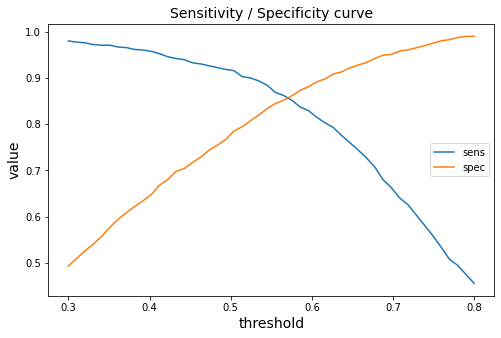

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.576
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.851
Confidence Interval: [0.826, 0.875]
-------------------------------------
Specificity: 
Mean: 0.862
Confidence Interval: [0.842, 0.881]
-------------------------------------
f1: 
Mean: 0.828
Confidence Interval: [0.809, 0.847]
-------------------------------------
auc: 
Mean: 0.933
Confidence Interval: [0.923, 0.943]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.916
Confidence Interval: [0.896, 0.935]
-------------------------------------
Specificity: 
Mean: 0.777
Confidence Interval: [0.752, 0.801]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.401 (1.401)	Loss 0.0416 (0.0416)	Sensitivity 0.818 (0.818)	Specificity 0.857 (0.857)	F1 0.783 (0.783)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.592 (0.665)	Loss 0.0624 (0.0480)	Sensitivity 0.937 (0.874)	Specificity 0.625 (0.761)	F1 0.811 (0.775)	Accuracy 0.781 (0.810)	
Val: [20/60]	Time 0.591 (0.628)	Loss 0.0636 (0.0552)	Sensitivity 0.714 (0.812)	Specificity 0.833 (0.775)	F1 0.741 (0.756)	Accuracy 0.781 (0.792)	
Val: [30/60]	Time 0.589 (0.617)	Loss 0.0275 (0.0560)	Sensitivity 0.875 (0.809)	Specificity 0.937 (0.790)	F1 0.903 (0.758)	Accuracy 0.906 (0.797)	
Val: [40/60]	Time 0.591 (0.612)	Loss 0.0352 (0.0521)	Sensitivity 1.000 (0.824)	Specificity 0.833 (0.805)	F1 0.903 (0.776)	Accuracy 0.906 (0.812)	
Val: [50/60]	Time 0.588 (0.608)	Loss 0.0462 (0.0488)	Sensitivity 0.875 (0.832)	Specificity 0.937 (0.806)	F1 0.903 (0.777)	Accuracy 0.906 (0.816)	
 * Sensitivity 0.837 Specificity 0.810 F1 0.781 Acc 0.820 ROC AUC 0.916


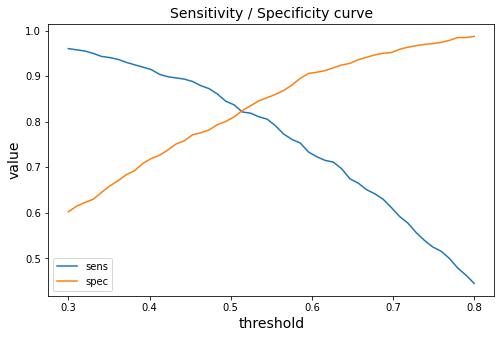

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.514
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.822
Confidence Interval: [0.793, 0.848]
-------------------------------------
Specificity: 
Mean: 0.825
Confidence Interval: [0.802, 0.849]
-------------------------------------
f1: 
Mean: 0.790
Confidence Interval: [0.766, 0.812]
-------------------------------------
auc: 
Mean: 0.916
Confidence Interval: [0.903, 0.928]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.839
Confidence Interval: [0.814, 0.866]
-------------------------------------
Specificity: 
Mean: 0.808
Confidence Interval: [0.786, 0.829]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.388 (1.388)	Loss 0.0637 (0.0637)	Sensitivity 0.714 (0.714)	Specificity 0.722 (0.722)	F1 0.690 (0.690)	Accuracy 0.719 (0.719)	
Val: [10/60]	Time 0.589 (0.664)	Loss 0.0220 (0.0395)	Sensitivity 1.000 (0.896)	Specificity 0.818 (0.802)	F1 0.833 (0.810)	Accuracy 0.875 (0.838)	
Val: [20/60]	Time 0.588 (0.626)	Loss 0.0323 (0.0381)	Sensitivity 1.000 (0.918)	Specificity 0.632 (0.776)	F1 0.788 (0.813)	Accuracy 0.781 (0.835)	
Val: [30/60]	Time 0.589 (0.614)	Loss 0.0304 (0.0378)	Sensitivity 1.000 (0.911)	Specificity 0.818 (0.769)	F1 0.833 (0.803)	Accuracy 0.875 (0.829)	
Val: [40/60]	Time 0.589 (0.607)	Loss 0.0376 (0.0390)	Sensitivity 0.857 (0.899)	Specificity 0.667 (0.768)	F1 0.750 (0.795)	Accuracy 0.750 (0.822)	
Val: [50/60]	Time 0.584 (0.604)	Loss 0.0713 (0.0402)	Sensitivity 0.692 (0.898)	Specificity 0.789 (0.771)	F1 0.692 (0.795)	Accuracy 0.750 (0.822)	
 * Sensitivity 0.902 Specificity 0.772 F1 0.799 Acc 0.825 ROC AUC 0.925


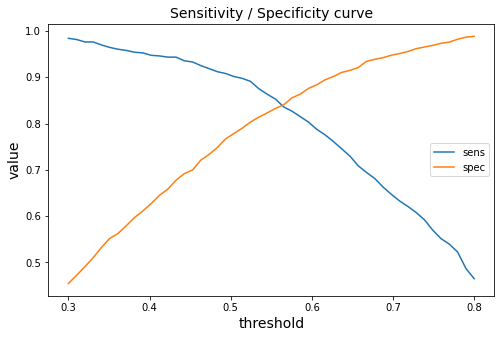

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.835
Confidence Interval: [0.807, 0.861]
-------------------------------------
Specificity: 
Mean: 0.841
Confidence Interval: [0.819, 0.861]
-------------------------------------
f1: 
Mean: 0.806
Confidence Interval: [0.785, 0.826]
-------------------------------------
auc: 
Mean: 0.924
Confidence Interval: [0.913, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.904
Confidence Interval: [0.882, 0.926]
-------------------------------------
Specificity: 
Mean: 0.771
Confidence Interval: [0.746, 0.797]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.360 (1.360)	Loss 0.0350 (0.0350)	Sensitivity 0.800 (0.800)	Specificity 0.864 (0.864)	F1 0.762 (0.762)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.581 (0.658)	Loss 0.0323 (0.0379)	Sensitivity 0.875 (0.871)	Specificity 0.792 (0.772)	F1 0.700 (0.777)	Accuracy 0.812 (0.810)	
Val: [20/60]	Time 0.587 (0.622)	Loss 0.0831 (0.0434)	Sensitivity 0.733 (0.854)	Specificity 0.882 (0.778)	F1 0.786 (0.766)	Accuracy 0.812 (0.808)	
Val: [30/60]	Time 0.590 (0.611)	Loss 0.0467 (0.0452)	Sensitivity 0.750 (0.844)	Specificity 0.750 (0.778)	F1 0.692 (0.767)	Accuracy 0.750 (0.805)	
Val: [40/60]	Time 0.583 (0.605)	Loss 0.0205 (0.0453)	Sensitivity 1.000 (0.848)	Specificity 0.889 (0.790)	F1 0.933 (0.775)	Accuracy 0.938 (0.812)	
Val: [50/60]	Time 0.589 (0.601)	Loss 0.0255 (0.0436)	Sensitivity 0.875 (0.848)	Specificity 0.875 (0.793)	F1 0.875 (0.777)	Accuracy 0.875 (0.816)	
 * Sensitivity 0.851 Specificity 0.803 F1 0.785 Acc 0.823 ROC AUC 0.919


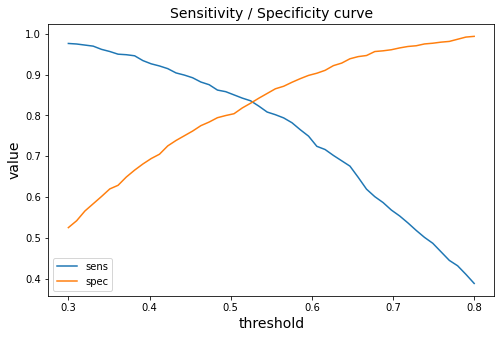

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.524
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.836
Confidence Interval: [0.807, 0.865]
-------------------------------------
Specificity: 
Mean: 0.830
Confidence Interval: [0.806, 0.852]
-------------------------------------
f1: 
Mean: 0.800
Confidence Interval: [0.777, 0.823]
-------------------------------------
auc: 
Mean: 0.919
Confidence Interval: [0.906, 0.930]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.853
Confidence Interval: [0.827, 0.879]
-------------------------------------
Specificity: 
Mean: 0.803
Confidence Interval: [0.780, 0.825]
-------------------------------------
f1: 
M

In [ ]:
# iteratively for each model, find best threshold so that sens and spec are close enough
# save the best thresholds for evaluation on the test set

t_list = []
for i in range(len(weight_list)):
    wi = weight_list[i]
    model = model_names[i]
    conf = tune_config(wi, model)
    # finding best threshold for a given model
    # print bootstrap results on the validation data
    best_t = threshold_tuning(conf)
    t_list.append(best_t)

print('best thresholds: ', t_list)

In [ ]:
# bootstrap iterations
itr = 1000
# metrics
metrics = ['sen', 'spe', 'auc', 'f1']
# confidence interval alpha
alpha = 0.05
results_path = 'results/auc/'

In [ ]:
t_list = [0.565, 0.555, 0.565, 0.576, 0.514, 0.565, 0.524]

In [ ]:
# print bootstrap results on the test data
te_best = test_evaluations(weight_list, t_list, metrics, model_names, results_path, itr, alpha)
te_best.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 3.405 (3.405)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.571 (0.830)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 0.572 (0.708)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.586 (0.667)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 0.583 (0.645)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.586 (0.632)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.360 (1.360)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.579 (0.656)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.582 (0.623)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.589 (0.611)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.588 (0.606)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.593 (0.603)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.279 (1.279)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.586 (0.654)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.597 (0.625)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.592 (0.614)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.588 (0.608)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.595 (0.604)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.391 (1.391)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.591 (0.661)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.586 (0.627)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.589 (0.615)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.590 (0.609)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.590 (0.605)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200716-1520_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200716-1520_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 35)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.327 (1.327)	Loss 0.0219 (0.0219)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.585 (0.658)	Loss 0.0263 (0.0257)	Accuracy 0.844 (0.852)	
Test: [20/59]	Time 0.583 (0.626)	Loss 0.0154 (0.0236)	Accuracy 0.938 (0.882)	
Test: [30/59]	Time 0.597 (0.615)	Loss 0.0296 (0.0284)	Accuracy 0.750 (0.834)	
Test: [40/59]	Time 0.591 (0.609)	Loss 0.0853 (0.0348)	Accuracy 0.875 (0.839)	
Test: [50/59]	Time 0.587 (0.605)	Loss 0.0341 (0.0389)	Accuracy 0.906 (0.847)	
 * Acc 0.848 ROC AUC 0.930
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.276 (1.276)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.599 (0.654)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.596 (0.625)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.591 (0.614)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.587 (0.608)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.584 (0.605)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:335: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.262 (1.262)	Loss 0.0351 (0.0351)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.592 (0.654)	Loss 0.0257 (0.0266)	Accuracy 0.781 (0.812)	
Test: [20/59]	Time 0.592 (0.623)	Loss 0.0164 (0.0257)	Accuracy 0.875 (0.851)	
Test: [30/59]	Time 0.590 (0.613)	Loss 0.0240 (0.0281)	Accuracy 0.844 (0.825)	
Test: [40/59]	Time 0.589 (0.608)	Loss 0.0593 (0.0328)	Accuracy 0.906 (0.833)	
Test: [50/59]	Time 0.594 (0.604)	Loss 0.0365 (0.0370)	Accuracy 0.938 (0.843)	


  0%|          | 2/1000 [00:00<00:57, 17.27it/s]

 * Acc 0.843 ROC AUC 0.929


100%|██████████| 1000/1000 [00:57<00:00, 17.49it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.869
Confidence Interval: [0.843, 0.894]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.846
Confidence Interval: [0.826, 0.866]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.933
Confidence Interval: [0.921, 0.944]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.828
Confidence Interval: [0.809, 0.848]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.860
Confidence Interval: [0.834, 0.886]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

Normal test for baseline model: 
p_normal value:  0.8728352785110474
Normal test: 
p_normal value:  0.030783209949731827
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 28.203313851358633
p: 7.952553700079647e-148
************************************************************


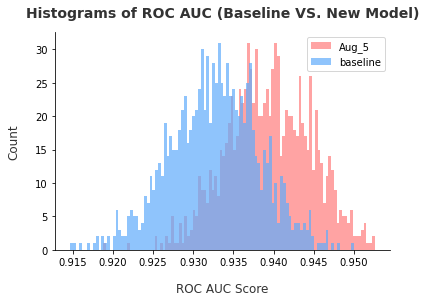

Normal test: 
p_normal value:  0.15649284422397614
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 7.17859630041405
p: 4.944500282665092e-13
************************************************************


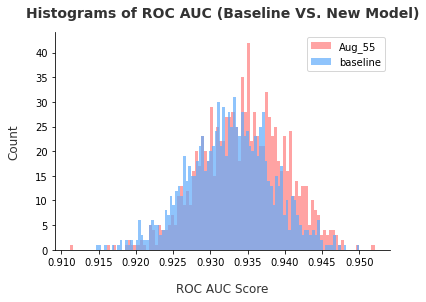

Normal test: 
p_normal value:  0.14166252315044403
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 50.07192637749907
p: 0.0
************************************************************


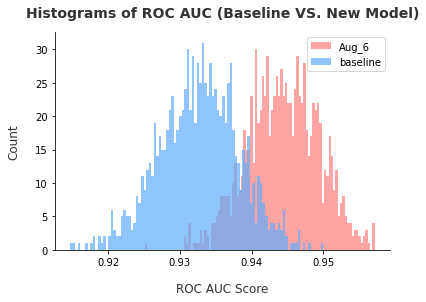

Normal test: 
p_normal value:  0.06703221797943115
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: -9.396998853411331
p: 7.442281360292663e-21
************************************************************


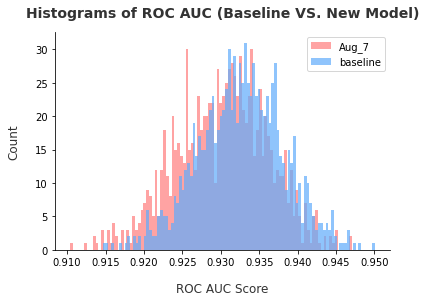

Normal test: 
p_normal value:  0.21078084409236908
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 5.999681588954795
p: 1.1705695390634604e-09
************************************************************


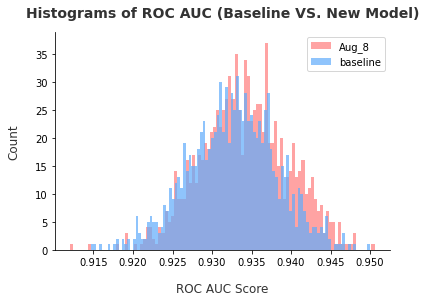

Normal test: 
p_normal value:  0.6022129654884338
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: -13.044608252138818
p: 1.1115059133893617e-37
************************************************************


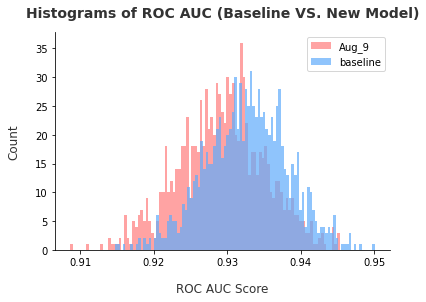

In [ ]:
# T test of ROC AUC and histograms of ROC AUC for all new models (compared with the baseline)
# p value << 0.05 shows that the differences between the AUC scores are statistically signficant
te_best.t_test_auc()

Normal test for baseline model: 
p_normal value:  0.535005509853363
Normal test: 
p_normal value:  0.8769833445549011
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 25.035027344697465
p: 7.699909687766292e-121
************************************************************


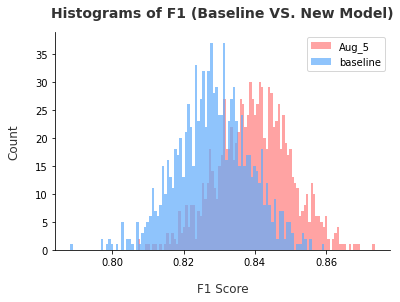

Normal test: 
p_normal value:  0.6293026208877563
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 12.717883030217912
p: 5.465585741282096e-36
************************************************************


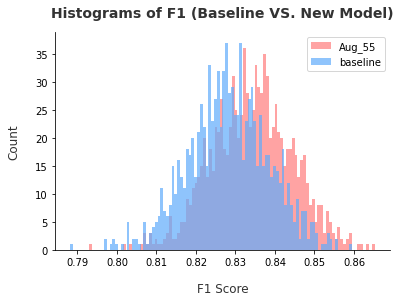

Normal test: 
p_normal value:  0.709940493106842
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 39.533007653734344
p: 3.7111835067517004e-253
************************************************************


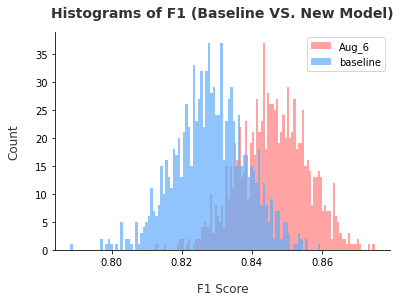

Normal test: 
p_normal value:  0.5668998956680298
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: -13.595753504068579
p: 1.2582000454465267e-40
************************************************************


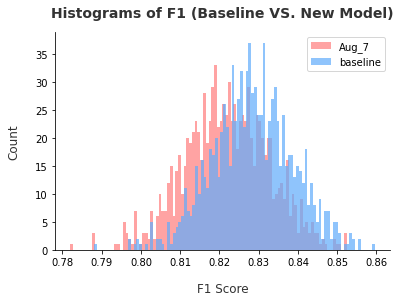

Normal test: 
p_normal value:  0.19032076001167297
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 16.4080184438256
p: 3.697291836801372e-57
************************************************************


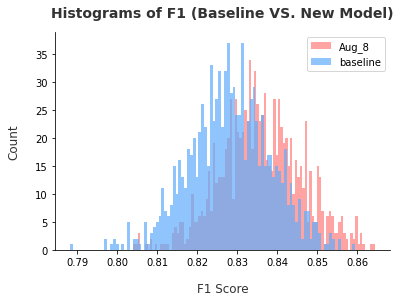

Normal test: 
p_normal value:  0.19803288578987122
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: -3.4449903513369415
p: 0.00029143742715141664
************************************************************


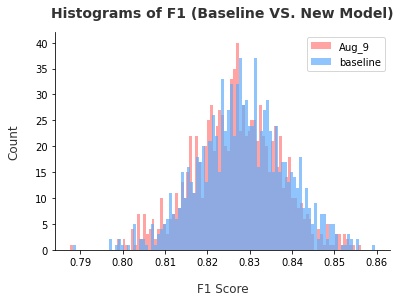

In [ ]:
te_best.t_test_f1()

In [ ]:
# default threshold = 0.5
default_t_list = [0.5] * 7
te_default = test_evaluations(weight_list, default_t_list, metrics, model_names, results_path, itr, alpha)
te_default.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.897 (0.897)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.229 (0.293)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 0.233 (0.263)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.233 (0.253)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 0.230 (0.248)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.234 (0.245)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.995 (0.995)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.236 (0.305)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.237 (0.272)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.237 (0.261)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.237 (0.255)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.237 (0.252)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.923 (0.923)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.243 (0.303)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.241 (0.273)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.241 (0.263)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.241 (0.257)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.237 (0.253)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.824 (0.824)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.236 (0.290)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.234 (0.264)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.238 (0.254)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.238 (0.250)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.232 (0.246)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200716-1520_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200716-1520_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 35)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.826 (0.826)	Loss 0.0219 (0.0219)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.229 (0.286)	Loss 0.0263 (0.0257)	Accuracy 0.844 (0.852)	
Test: [20/59]	Time 0.232 (0.260)	Loss 0.0154 (0.0236)	Accuracy 0.938 (0.882)	
Test: [30/59]	Time 0.232 (0.251)	Loss 0.0296 (0.0284)	Accuracy 0.750 (0.834)	
Test: [40/59]	Time 0.232 (0.246)	Loss 0.0853 (0.0348)	Accuracy 0.875 (0.839)	
Test: [50/59]	Time 0.230 (0.243)	Loss 0.0341 (0.0389)	Accuracy 0.906 (0.847)	
 * Acc 0.848 ROC AUC 0.930
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.854 (0.854)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.231 (0.290)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.233 (0.263)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.237 (0.253)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.235 (0.249)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.235 (0.246)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.950 (0.950)	Loss 0.0351 (0.0351)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.237 (0.304)	Loss 0.0257 (0.0266)	Accuracy 0.781 (0.812)	
Test: [20/59]	Time 0.237 (0.272)	Loss 0.0164 (0.0257)	Accuracy 0.875 (0.851)	
Test: [30/59]	Time 0.238 (0.261)	Loss 0.0240 (0.0281)	Accuracy 0.844 (0.825)	
Test: [40/59]	Time 0.238 (0.255)	Loss 0.0593 (0.0328)	Accuracy 0.906 (0.833)	
Test: [50/59]	Time 0.236 (0.251)	Loss 0.0365 (0.0370)	Accuracy 0.938 (0.843)	


  0%|          | 3/1000 [00:00<00:43, 22.79it/s]

 * Acc 0.843 ROC AUC 0.929


100%|██████████| 1000/1000 [00:44<00:00, 22.44it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.921
Confidence Interval: [0.901, 0.939]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.751
Confidence Interval: [0.726, 0.776]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.932
Confidence Interval: [0.922, 0.942]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.804
Confidence Interval: [0.784, 0.825]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.896
Confidence Interval: [0.874, 0.918]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

Additional experiments:

rerun f1's models with 0.8 threshold

In [ ]:
class tune_config:
    path_data = 'data/'
    arch = 'drn_c_26'
    workers = 4
    batch_size = 32
    print_freq = 10
    pretrained = 0
    crop_size = 224
    scale_size = 256
    results_path = 'results/new_f1/'
    bootstrap_itr = 1000
    bootstrap_alpha = 0.05
    def __init__(self, weights, model_name):
        self.load_weights = weights
        self.model_name = model_name


In [ ]:
# trained models ready for evaluation
weight_list = ['classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar', 
          'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar',
          'classify_01_models/classify_20200722-2023_aug_a2b_8_focal_SGD_lr_0.1_best_f1/model_best.pth.tar',
          'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'] 

# names of the models (for display results only)
model_names = ['Baseline', 'Aug_5', 'Aug_55', 'Aug_6', 'Aug_7', 'Aug_8', 'Aug_9']



=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 3.588 (3.588)	Loss 0.0715 (0.0715)	Sensitivity 0.857 (0.857)	Specificity 0.833 (0.833)	F1 0.828 (0.828)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.571 (0.844)	Loss 0.1656 (0.1061)	Sensitivity 0.769 (0.758)	Specificity 1.000 (0.877)	F1 0.870 (0.775)	Accuracy 0.906 (0.835)	
Val: [20/60]	Time 0.576 (0.715)	Loss 0.0617 (0.0977)	Sensitivity 0.769 (0.755)	Specificity 0.895 (0.887)	F1 0.800 (0.777)	Accuracy 0.844 (0.836)	
Val: [30/60]	Time 0.576 (0.670)	Loss 0.0696 (0.0951)	Sensitivity 0.786 (0.764)	Specificity 0.833 (0.877)	F1 0.786 (0.779)	Accuracy 0.812 (0.833)	
Val: [40/60]	Time 0.581 (0.648)	Loss 0.0772 (0.0913)	Sensitivity 0.800 (0.766)	Specificity 0.773 (0.868)	F1 0.696 (0.775)	Accuracy 0.781 (0.828)	
Val: [50/60]	Time 0.579 (0.634)	Loss 0.0445 (0.0846)	Sensitivity 0.875 (0.774)	Specificity 0.833 (0.867)	F1 0.737 (0.774)	Accuracy 0.844 (0.830)	
 * Sensitivity 0.780 Specificity 0.871 F1 0.783 Acc 0.834 ROC AUC 0.912


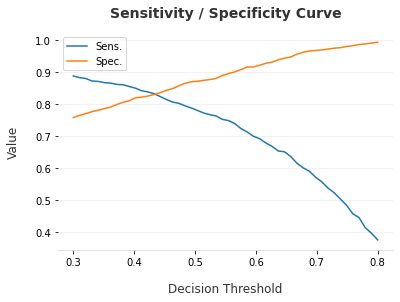

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.433
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.832
Confidence Interval: [0.807, 0.859]
-------------------------------------
Specificity: 
Mean: 0.829
Confidence Interval: [0.806, 0.850]
-------------------------------------
f1: 
Mean: 0.798
Confidence Interval: [0.776, 0.819]
-------------------------------------
auc: 
Mean: 0.912
Confidence Interval: [0.898, 0.924]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.782
Confidence Interval: [0.753, 0.811]
-------------------------------------
Specificity: 
Mean: 0.869
Confidence Interval: [0.849, 0.889]
-------------------------------------


/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.514 (1.514)	Loss 0.0504 (0.0504)	Sensitivity 0.923 (0.923)	Specificity 0.947 (0.947)	F1 0.923 (0.923)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.580 (0.671)	Loss 0.0452 (0.0427)	Sensitivity 0.923 (0.875)	Specificity 0.895 (0.877)	F1 0.889 (0.862)	Accuracy 0.906 (0.878)	
Val: [20/60]	Time 0.587 (0.629)	Loss 0.0545 (0.0524)	Sensitivity 0.800 (0.859)	Specificity 0.647 (0.849)	F1 0.727 (0.832)	Accuracy 0.719 (0.854)	
Val: [30/60]	Time 0.592 (0.615)	Loss 0.0447 (0.0497)	Sensitivity 0.778 (0.867)	Specificity 0.870 (0.833)	F1 0.737 (0.823)	Accuracy 0.844 (0.848)	
Val: [40/60]	Time 0.578 (0.608)	Loss 0.0276 (0.0488)	Sensitivity 0.833 (0.870)	Specificity 0.950 (0.824)	F1 0.870 (0.818)	Accuracy 0.906 (0.845)	
Val: [50/60]	Time 0.596 (0.604)	Loss 0.0273 (0.0462)	Sensitivity 1.000 (0.879)	Specificity 0.727 (0.814)	F1 0.769 (0.816)	Accuracy 0.812 (0.841)	
 * Sensitivity 0.878 Specificity 0.816 F1 0.817 Acc 0.842 ROC AUC 0.925


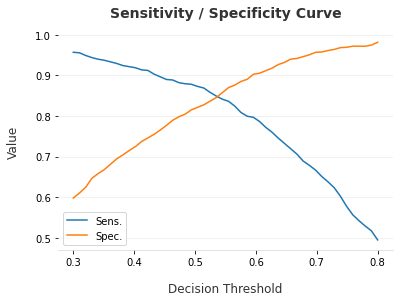

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.849
Confidence Interval: [0.824, 0.874]
-------------------------------------
Specificity: 
Mean: 0.845
Confidence Interval: [0.824, 0.866]
-------------------------------------
f1: 
Mean: 0.817
Confidence Interval: [0.796, 0.838]
-------------------------------------
auc: 
Mean: 0.925
Confidence Interval: [0.913, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.877
Confidence Interval: [0.852, 0.900]
-------------------------------------
Specificity: 
Mean: 0.819
Confidence Interval: [0.797, 0.840]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.410 (1.410)	Loss 0.0500 (0.0500)	Sensitivity 0.900 (0.900)	Specificity 0.818 (0.818)	F1 0.783 (0.783)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.600 (0.667)	Loss 0.0326 (0.0454)	Sensitivity 0.937 (0.887)	Specificity 0.812 (0.797)	F1 0.882 (0.803)	Accuracy 0.875 (0.835)	
Val: [20/60]	Time 0.581 (0.630)	Loss 0.0176 (0.0397)	Sensitivity 1.000 (0.913)	Specificity 0.850 (0.802)	F1 0.889 (0.822)	Accuracy 0.906 (0.848)	
Val: [30/60]	Time 0.591 (0.617)	Loss 0.0356 (0.0420)	Sensitivity 0.818 (0.907)	Specificity 0.905 (0.823)	F1 0.818 (0.829)	Accuracy 0.875 (0.857)	
Val: [40/60]	Time 0.592 (0.610)	Loss 0.0393 (0.0437)	Sensitivity 0.929 (0.904)	Specificity 0.889 (0.825)	F1 0.897 (0.829)	Accuracy 0.906 (0.855)	
Val: [50/60]	Time 0.586 (0.606)	Loss 0.2004 (0.0465)	Sensitivity 0.812 (0.893)	Specificity 0.875 (0.819)	F1 0.839 (0.822)	Accuracy 0.844 (0.848)	
 * Sensitivity 0.898 Specificity 0.824 F1 0.827 Acc 0.852 ROC AUC 0.934


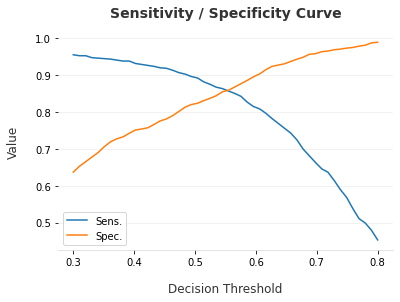

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.555
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.857
Confidence Interval: [0.833, 0.882]
-------------------------------------
Specificity: 
Mean: 0.859
Confidence Interval: [0.839, 0.878]
-------------------------------------
f1: 
Mean: 0.830
Confidence Interval: [0.811, 0.849]
-------------------------------------
auc: 
Mean: 0.934
Confidence Interval: [0.923, 0.944]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.896
Confidence Interval: [0.874, 0.919]
-------------------------------------
Specificity: 
Mean: 0.823
Confidence Interval: [0.801, 0.845]
-------------------------------------
f1: 

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.447 (1.447)	Loss 0.0348 (0.0348)	Sensitivity 0.941 (0.941)	Specificity 0.933 (0.933)	F1 0.941 (0.941)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.590 (0.664)	Loss 0.0726 (0.0407)	Sensitivity 0.727 (0.861)	Specificity 0.810 (0.798)	F1 0.696 (0.802)	Accuracy 0.781 (0.827)	
Val: [20/60]	Time 0.582 (0.625)	Loss 0.0280 (0.0398)	Sensitivity 0.800 (0.875)	Specificity 0.955 (0.807)	F1 0.842 (0.810)	Accuracy 0.906 (0.836)	
Val: [30/60]	Time 0.586 (0.611)	Loss 0.0307 (0.0396)	Sensitivity 0.900 (0.868)	Specificity 0.818 (0.819)	F1 0.783 (0.812)	Accuracy 0.844 (0.841)	
Val: [40/60]	Time 0.582 (0.605)	Loss 0.0323 (0.0402)	Sensitivity 0.909 (0.858)	Specificity 0.857 (0.815)	F1 0.833 (0.803)	Accuracy 0.875 (0.835)	
Val: [50/60]	Time 0.587 (0.601)	Loss 0.0439 (0.0404)	Sensitivity 0.917 (0.866)	Specificity 0.700 (0.817)	F1 0.759 (0.808)	Accuracy 0.781 (0.840)	
 * Sensitivity 0.869 Specificity 0.817 F1 0.808 Acc 0.841 ROC AUC 0.925


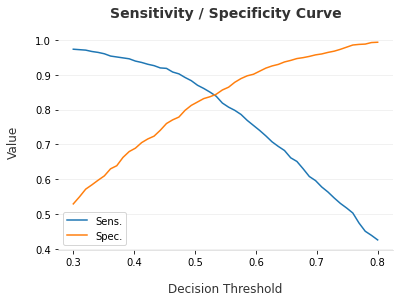

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.838
Confidence Interval: [0.812, 0.863]
-------------------------------------
Specificity: 
Mean: 0.844
Confidence Interval: [0.823, 0.864]
-------------------------------------
f1: 
Mean: 0.810
Confidence Interval: [0.789, 0.830]
-------------------------------------
auc: 
Mean: 0.925
Confidence Interval: [0.914, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.875
Confidence Interval: [0.852, 0.898]
-------------------------------------
Specificity: 
Mean: 0.819
Confidence Interval: [0.796, 0.841]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.331 (1.331)	Loss 0.0246 (0.0246)	Sensitivity 0.909 (0.909)	Specificity 0.762 (0.762)	F1 0.769 (0.769)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.587 (0.654)	Loss 0.0349 (0.0531)	Sensitivity 1.000 (0.869)	Specificity 0.842 (0.792)	F1 0.897 (0.779)	Accuracy 0.906 (0.824)	
Val: [20/60]	Time 0.584 (0.623)	Loss 0.0307 (0.0509)	Sensitivity 1.000 (0.869)	Specificity 0.762 (0.805)	F1 0.815 (0.784)	Accuracy 0.844 (0.830)	
Val: [30/60]	Time 0.588 (0.611)	Loss 0.0339 (0.0500)	Sensitivity 0.818 (0.870)	Specificity 0.714 (0.804)	F1 0.692 (0.795)	Accuracy 0.750 (0.833)	
Val: [40/60]	Time 0.589 (0.605)	Loss 0.0679 (0.0512)	Sensitivity 0.833 (0.872)	Specificity 0.857 (0.798)	F1 0.857 (0.792)	Accuracy 0.844 (0.827)	
Val: [50/60]	Time 0.589 (0.602)	Loss 0.0423 (0.0490)	Sensitivity 0.867 (0.873)	Specificity 1.000 (0.805)	F1 0.929 (0.800)	Accuracy 0.938 (0.832)	
 * Sensitivity 0.878 Specificity 0.802 F1 0.800 Acc 0.833 ROC AUC 0.919


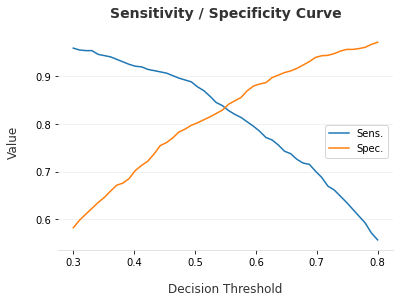

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.545
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.839
Confidence Interval: [0.812, 0.865]
-------------------------------------
Specificity: 
Mean: 0.829
Confidence Interval: [0.806, 0.851]
-------------------------------------
f1: 
Mean: 0.802
Confidence Interval: [0.779, 0.824]
-------------------------------------
auc: 
Mean: 0.919
Confidence Interval: [0.905, 0.932]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.880
Confidence Interval: [0.856, 0.903]
-------------------------------------
Specificity: 
Mean: 0.801
Confidence Interval: [0.776, 0.824]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.420 (1.420)	Loss 0.0381 (0.0381)	Sensitivity 0.846 (0.846)	Specificity 0.895 (0.895)	F1 0.846 (0.846)	Accuracy 0.875 (0.875)	
Val: [10/60]	Time 0.592 (0.666)	Loss 0.0408 (0.0378)	Sensitivity 0.929 (0.887)	Specificity 0.667 (0.760)	F1 0.788 (0.784)	Accuracy 0.781 (0.810)	
Val: [20/60]	Time 0.582 (0.627)	Loss 0.0745 (0.0426)	Sensitivity 0.733 (0.867)	Specificity 0.529 (0.756)	F1 0.647 (0.768)	Accuracy 0.625 (0.799)	
Val: [30/60]	Time 0.584 (0.614)	Loss 0.0725 (0.0435)	Sensitivity 0.765 (0.863)	Specificity 0.933 (0.786)	F1 0.839 (0.784)	Accuracy 0.844 (0.814)	
Val: [40/60]	Time 0.588 (0.607)	Loss 0.0452 (0.0406)	Sensitivity 0.875 (0.872)	Specificity 0.750 (0.802)	F1 0.824 (0.795)	Accuracy 0.812 (0.828)	
Val: [50/60]	Time 0.591 (0.603)	Loss 0.0677 (0.0423)	Sensitivity 0.733 (0.869)	Specificity 0.824 (0.801)	F1 0.759 (0.799)	Accuracy 0.781 (0.827)	
 * Sensitivity 0.871 Specificity 0.807 F1 0.803 Acc 0.832 ROC AUC 0.918


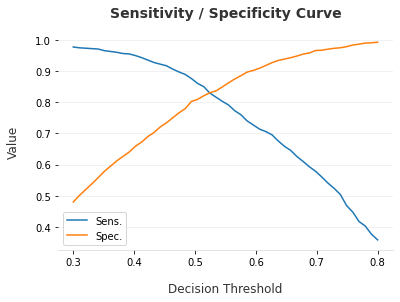

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.524
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.830
Confidence Interval: [0.803, 0.856]
-------------------------------------
Specificity: 
Mean: 0.830
Confidence Interval: [0.809, 0.851]
-------------------------------------
f1: 
Mean: 0.798
Confidence Interval: [0.777, 0.819]
-------------------------------------
auc: 
Mean: 0.918
Confidence Interval: [0.906, 0.930]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.868
Confidence Interval: [0.842, 0.889]
-------------------------------------
Specificity: 
Mean: 0.809
Confidence Interval: [0.785, 0.832]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.380 (1.380)	Loss 0.0355 (0.0355)	Sensitivity 0.917 (0.917)	Specificity 0.750 (0.750)	F1 0.786 (0.786)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.590 (0.661)	Loss 0.0369 (0.0404)	Sensitivity 1.000 (0.891)	Specificity 0.737 (0.756)	F1 0.839 (0.789)	Accuracy 0.844 (0.810)	
Val: [20/60]	Time 0.577 (0.623)	Loss 0.0545 (0.0380)	Sensitivity 0.812 (0.886)	Specificity 0.750 (0.788)	F1 0.788 (0.806)	Accuracy 0.781 (0.826)	
Val: [30/60]	Time 0.588 (0.611)	Loss 0.0444 (0.0378)	Sensitivity 0.889 (0.889)	Specificity 0.739 (0.797)	F1 0.696 (0.801)	Accuracy 0.781 (0.831)	
Val: [40/60]	Time 0.580 (0.605)	Loss 0.0309 (0.0405)	Sensitivity 1.000 (0.881)	Specificity 0.833 (0.797)	F1 0.903 (0.803)	Accuracy 0.906 (0.830)	
Val: [50/60]	Time 0.580 (0.601)	Loss 0.0592 (0.0405)	Sensitivity 0.750 (0.879)	Specificity 0.800 (0.794)	F1 0.720 (0.800)	Accuracy 0.781 (0.828)	
 * Sensitivity 0.878 Specificity 0.796 F1 0.798 Acc 0.829 ROC AUC 0.920


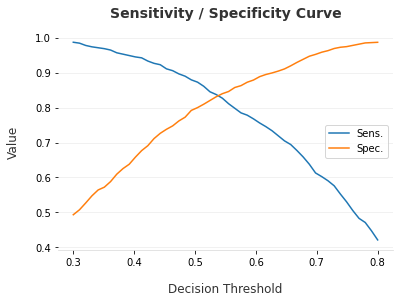

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.535
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.837
Confidence Interval: [0.811, 0.862]
-------------------------------------
Specificity: 
Mean: 0.831
Confidence Interval: [0.809, 0.851]
-------------------------------------
f1: 
Mean: 0.802
Confidence Interval: [0.778, 0.823]
-------------------------------------
auc: 
Mean: 0.920
Confidence Interval: [0.908, 0.931]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.877
Confidence Interval: [0.853, 0.900]
-------------------------------------
Specificity: 
Mean: 0.796
Confidence Interval: [0.772, 0.819]
-------------------------------------
f1: 
M

In [ ]:
# iteratively for each model, find best threshold so that sens and spec are close enough
# save the best thresholds for evaluation on the test set

t_list = []
for i in range(len(weight_list)):
    wi = weight_list[i]
    model = model_names[i]
    conf = tune_config(wi, model)
    # finding best threshold for a given model
    # print bootstrap results on the validation data
    best_t = threshold_tuning(conf)
    t_list.append(best_t)

print('best thresholds: ', t_list)

In [ ]:
# bootstrap iterations
itr = 1000
# metrics
metrics = ['sen', 'spe', 'auc', 'f1']
# confidence interval alpha
alpha = 0.05
results_path = 'results/new_f1/'
t_list = [0.433, 0.535, 0.555, 0.535, 0.545, 0.524, 0.535]

In [ ]:
# print bootstrap results on the test data
te_best = test_evaluations(weight_list, t_list, metrics, model_names, results_path, itr, alpha)
te_best.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 26.351 (26.351)	Loss 0.0166 (0.0166)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.212 (6.435)	Loss 0.0206 (0.0206)	Accuracy 0.812 (0.869)	
Test: [20/59]	Time 16.956 (6.417)	Loss 0.0152 (0.0177)	Accuracy 0.938 (0.890)	
Test: [30/59]	Time 0.219 (5.804)	Loss 0.0052 (0.0174)	Accuracy 0.969 (0.886)	
Test: [40/59]	Time 20.524 (5.944)	Loss 0.0357 (0.0362)	Accuracy 0.938 (0.877)	
Test: [50/59]	Time 0.224 (5.610)	Loss 0.1090 (0.0545)	Accuracy 0.812 (0.859)	
 * Acc 0.849 ROC AUC 0.924
=> loading checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 41)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.880 (0.880)	Loss 0.0215 (0.0215)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.236 (0.299)	Loss 0.0260 (0.0239)	Accuracy 0.812 (0.855)	
Test: [20/59]	Time 0.239 (0.270)	Loss 0.0184 (0.0231)	Accuracy 0.875 (0.871)	
Test: [30/59]	Time 0.242 (0.261)	Loss 0.0176 (0.0266)	Accuracy 0.875 (0.842)	
Test: [40/59]	Time 0.240 (0.256)	Loss 0.0561 (0.0321)	Accuracy 0.875 (0.842)	
Test: [50/59]	Time 0.242 (0.254)	Loss 0.0253 (0.0354)	Accuracy 0.938 (0.853)	
 * Acc 0.860 ROC AUC 0.940
=> loading checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 38)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.932 (0.932)	Loss 0.0204 (0.0204)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.239 (0.306)	Loss 0.0210 (0.0248)	Accuracy 0.844 (0.818)	
Test: [20/59]	Time 0.240 (0.274)	Loss 0.0151 (0.0203)	Accuracy 0.906 (0.857)	
Test: [30/59]	Time 0.237 (0.262)	Loss 0.0173 (0.0232)	Accuracy 0.844 (0.836)	
Test: [40/59]	Time 0.237 (0.256)	Loss 0.0563 (0.0312)	Accuracy 0.875 (0.838)	
Test: [50/59]	Time 0.233 (0.252)	Loss 0.0313 (0.0369)	Accuracy 0.906 (0.849)	
 * Acc 0.855 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.874 (0.874)	Loss 0.0220 (0.0220)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.233 (0.293)	Loss 0.0246 (0.0232)	Accuracy 0.875 (0.875)	
Test: [20/59]	Time 0.232 (0.264)	Loss 0.0140 (0.0201)	Accuracy 0.906 (0.885)	
Test: [30/59]	Time 0.228 (0.254)	Loss 0.0228 (0.0243)	Accuracy 0.812 (0.845)	
Test: [40/59]	Time 0.230 (0.249)	Loss 0.0428 (0.0289)	Accuracy 0.938 (0.847)	
Test: [50/59]	Time 0.229 (0.245)	Loss 0.0497 (0.0328)	Accuracy 0.875 (0.857)	
 * Acc 0.860 ROC AUC 0.941
=> loading checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 52)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.848 (0.848)	Loss 0.0252 (0.0252)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.233 (0.288)	Loss 0.0371 (0.0324)	Accuracy 0.688 (0.838)	
Test: [20/59]	Time 0.231 (0.262)	Loss 0.0175 (0.0277)	Accuracy 0.906 (0.871)	
Test: [30/59]	Time 0.232 (0.252)	Loss 0.0159 (0.0344)	Accuracy 0.812 (0.821)	
Test: [40/59]	Time 0.231 (0.247)	Loss 0.0669 (0.0394)	Accuracy 0.875 (0.824)	
Test: [50/59]	Time 0.233 (0.244)	Loss 0.0269 (0.0423)	Accuracy 0.938 (0.838)	
 * Acc 0.847 ROC AUC 0.929
=> loading checkpoint 'classify_01_models/classify_20200722-2023_aug_a2b_8_focal_SGD_lr_0.1_best_f1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200722-2023_aug_a2b_8_focal_SGD_lr_0.1_best_f1/model_best.pth.tar' (epoch 49)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.765 (0.765)	Loss 0.0261 (0.0261)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.232 (0.285)	Loss 0.0182 (0.0265)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.235 (0.260)	Loss 0.0134 (0.0244)	Accuracy 0.938 (0.863)	
Test: [30/59]	Time 0.235 (0.251)	Loss 0.0160 (0.0272)	Accuracy 0.906 (0.832)	
Test: [40/59]	Time 0.236 (0.247)	Loss 0.0740 (0.0321)	Accuracy 0.844 (0.834)	
Test: [50/59]	Time 0.237 (0.245)	Loss 0.0380 (0.0356)	Accuracy 0.938 (0.846)	
 * Acc 0.852 ROC AUC 0.931
=> loading checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 63)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.918 (0.918)	Loss 0.0311 (0.0311)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.233 (0.297)	Loss 0.0244 (0.0273)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.232 (0.267)	Loss 0.0185 (0.0237)	Accuracy 0.938 (0.860)	
Test: [30/59]	Time 0.233 (0.257)	Loss 0.0159 (0.0285)	Accuracy 0.906 (0.828)	
Test: [40/59]	Time 0.234 (0.252)	Loss 0.0301 (0.0334)	Accuracy 0.906 (0.827)	
Test: [50/59]	Time 0.240 (0.249)	Loss 0.0222 (0.0352)	Accuracy 0.969 (0.843)	


  0%|          | 3/1000 [00:00<00:46, 21.47it/s]

 * Acc 0.853 ROC AUC 0.936


100%|██████████| 1000/1000 [00:43<00:00, 22.84it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.832
Confidence Interval: [0.804, 0.859]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.859
Confidence Interval: [0.839, 0.879]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.924
Confidence Interval: [0.912, 0.935]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.815
Confidence Interval: [0.794, 0.837]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.866
Confidence Interval: [0.842, 0.890]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

Normal test for baseline model: 
p_normal value:  0.056783538311719894
Normal test: 
p_normal value:  0.37112393975257874
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 64.80061981398183
p: 0.0
************************************************************


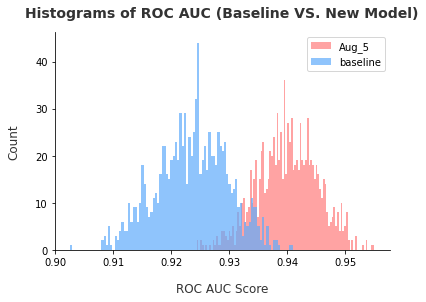

Normal test: 
p_normal value:  0.06910528987646103
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 59.03240487009914
p: 0.0
************************************************************


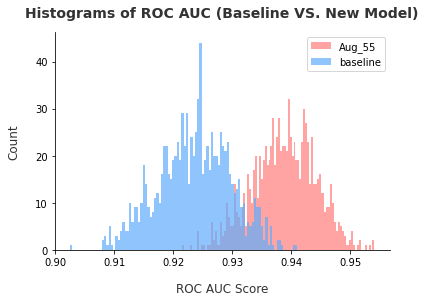

Normal test: 
p_normal value:  0.0014588270569220185
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 69.43429352175866
p: 0.0
************************************************************


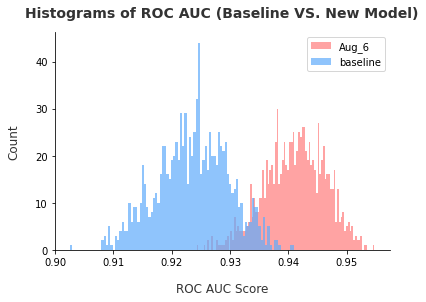

Normal test: 
p_normal value:  0.4198985695838928
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 19.904865122084342
p: 7.581418216072247e-81
************************************************************


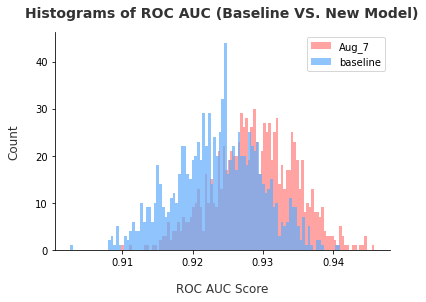

Normal test: 
p_normal value:  0.06845974922180176
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 29.88592454329802
p: 9.176728072488117e-163
************************************************************


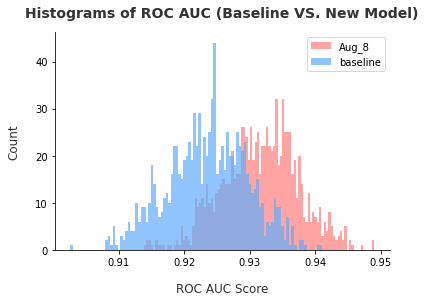

Normal test: 
p_normal value:  0.81976318359375
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: 47.628367726170175
p: 0.0
************************************************************


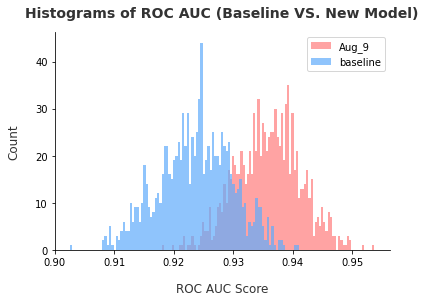

In [ ]:
# T test of ROC AUC and histograms of ROC AUC for all new models (compared with the baseline)
# p value << 0.05 shows that the differences between the AUC scores are statistically signficant
te_best.t_test_auc()

Normal test for baseline model: 
p_normal value:  0.2932588458061218
Normal test: 
p_normal value:  0.3227837383747101
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 41.31172136815772
p: 4.932368341509472e-270
************************************************************


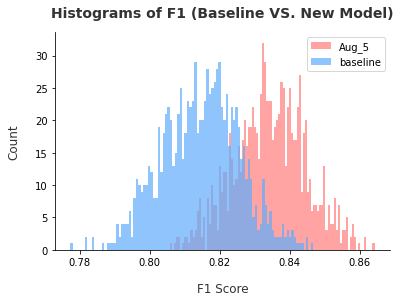

Normal test: 
p_normal value:  0.1291046142578125
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 42.7941300108041
p: 3.1263494460593996e-284
************************************************************


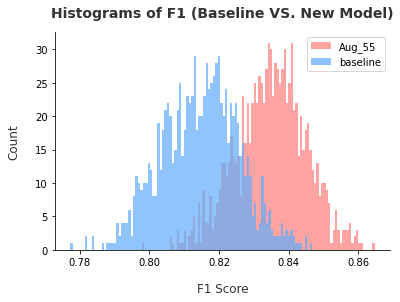

Normal test: 
p_normal value:  0.03743461146950722
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 46.8186847768084
p: 2e-323
************************************************************


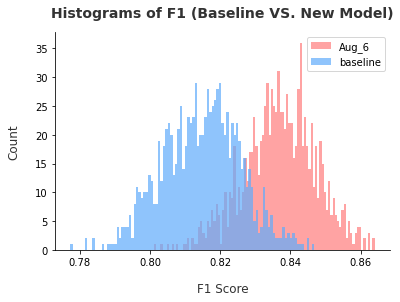

Normal test: 
p_normal value:  0.02576381526887417
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 24.252263152269222
p: 2.3447034588395313e-114
************************************************************


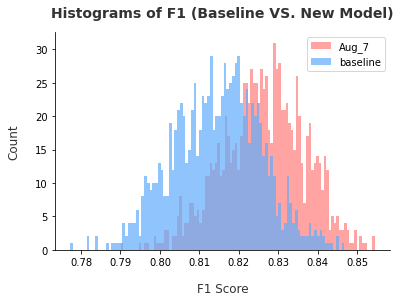

Normal test: 
p_normal value:  0.2896970212459564
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 33.49032846045998
p: 1.2225291599363593e-195
************************************************************


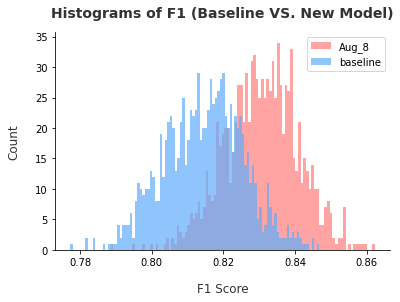

Normal test: 
p_normal value:  0.7991602420806885
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: 53.407787172167225
p: 0.0
************************************************************


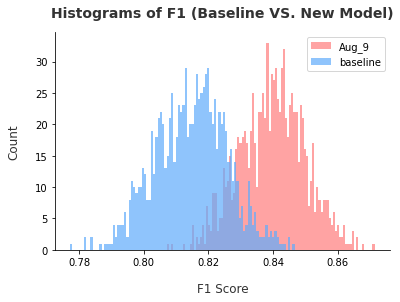

In [ ]:
te_best.t_test_f1()

In [ ]:
# default threshold = 0.5
default_t_list = [0.5] * 7
te_default = test_evaluations(weight_list, default_t_list, metrics, model_names, results_path, itr, alpha)
te_default.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.962 (0.962)	Loss 0.0166 (0.0166)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.237 (0.305)	Loss 0.0206 (0.0206)	Accuracy 0.812 (0.869)	
Test: [20/59]	Time 0.237 (0.272)	Loss 0.0152 (0.0177)	Accuracy 0.938 (0.890)	
Test: [30/59]	Time 0.237 (0.261)	Loss 0.0052 (0.0174)	Accuracy 0.969 (0.886)	
Test: [40/59]	Time 0.238 (0.255)	Loss 0.0357 (0.0362)	Accuracy 0.938 (0.877)	
Test: [50/59]	Time 0.238 (0.252)	Loss 0.1090 (0.0545)	Accuracy 0.812 (0.859)	
 * Acc 0.849 ROC AUC 0.924
=> loading checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200608-1230_aug_a2b_5_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 41)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.755 (0.755)	Loss 0.0215 (0.0215)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.244 (0.292)	Loss 0.0260 (0.0239)	Accuracy 0.812 (0.855)	
Test: [20/59]	Time 0.240 (0.269)	Loss 0.0184 (0.0231)	Accuracy 0.875 (0.871)	
Test: [30/59]	Time 0.246 (0.261)	Loss 0.0176 (0.0266)	Accuracy 0.875 (0.842)	
Test: [40/59]	Time 0.240 (0.256)	Loss 0.0561 (0.0321)	Accuracy 0.875 (0.842)	
Test: [50/59]	Time 0.244 (0.253)	Loss 0.0253 (0.0354)	Accuracy 0.938 (0.853)	
 * Acc 0.860 ROC AUC 0.940
=> loading checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200614-2125_aug_a2b_55_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 38)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.865 (0.865)	Loss 0.0204 (0.0204)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.236 (0.298)	Loss 0.0210 (0.0248)	Accuracy 0.844 (0.818)	
Test: [20/59]	Time 0.237 (0.269)	Loss 0.0151 (0.0203)	Accuracy 0.906 (0.857)	
Test: [30/59]	Time 0.236 (0.259)	Loss 0.0173 (0.0232)	Accuracy 0.844 (0.836)	
Test: [40/59]	Time 0.234 (0.253)	Loss 0.0563 (0.0312)	Accuracy 0.875 (0.838)	
Test: [50/59]	Time 0.234 (0.249)	Loss 0.0313 (0.0369)	Accuracy 0.906 (0.849)	
 * Acc 0.855 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200607-0728_aug_a2b_6_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 37)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.850 (0.850)	Loss 0.0220 (0.0220)	Accuracy 0.875 (0.875)	
Test: [10/59]	Time 0.233 (0.293)	Loss 0.0246 (0.0232)	Accuracy 0.875 (0.875)	
Test: [20/59]	Time 0.233 (0.264)	Loss 0.0140 (0.0201)	Accuracy 0.906 (0.885)	
Test: [30/59]	Time 0.238 (0.254)	Loss 0.0228 (0.0243)	Accuracy 0.812 (0.845)	
Test: [40/59]	Time 0.233 (0.249)	Loss 0.0428 (0.0289)	Accuracy 0.938 (0.847)	
Test: [50/59]	Time 0.234 (0.246)	Loss 0.0497 (0.0328)	Accuracy 0.875 (0.857)	
 * Acc 0.860 ROC AUC 0.941
=> loading checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200606-0638_aug_a2b_7_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 52)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.730 (0.730)	Loss 0.0252 (0.0252)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.232 (0.280)	Loss 0.0371 (0.0324)	Accuracy 0.688 (0.838)	
Test: [20/59]	Time 0.231 (0.257)	Loss 0.0175 (0.0277)	Accuracy 0.906 (0.871)	
Test: [30/59]	Time 0.230 (0.249)	Loss 0.0159 (0.0344)	Accuracy 0.812 (0.821)	
Test: [40/59]	Time 0.233 (0.245)	Loss 0.0669 (0.0394)	Accuracy 0.875 (0.824)	
Test: [50/59]	Time 0.232 (0.242)	Loss 0.0269 (0.0423)	Accuracy 0.938 (0.838)	
 * Acc 0.847 ROC AUC 0.929
=> loading checkpoint 'classify_01_models/classify_20200722-2023_aug_a2b_8_focal_SGD_lr_0.1_best_f1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200722-2023_aug_a2b_8_focal_SGD_lr_0.1_best_f1/model_best.pth.tar' (epoch 49)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.785 (0.785)	Loss 0.0261 (0.0261)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.230 (0.289)	Loss 0.0182 (0.0265)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.232 (0.262)	Loss 0.0134 (0.0244)	Accuracy 0.938 (0.863)	
Test: [30/59]	Time 0.230 (0.252)	Loss 0.0160 (0.0272)	Accuracy 0.906 (0.832)	
Test: [40/59]	Time 0.233 (0.247)	Loss 0.0740 (0.0321)	Accuracy 0.844 (0.834)	
Test: [50/59]	Time 0.229 (0.244)	Loss 0.0380 (0.0356)	Accuracy 0.938 (0.846)	
 * Acc 0.852 ROC AUC 0.931
=> loading checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200530-0756_aug_a2b_9_focal_SGD_lr_0.1/model_best.pth.tar' (epoch 63)


/content/gdrive/My Drive/final_files/classification/evaluation.py:342: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.881 (0.881)	Loss 0.0311 (0.0311)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.230 (0.293)	Loss 0.0244 (0.0273)	Accuracy 0.844 (0.821)	
Test: [20/59]	Time 0.231 (0.264)	Loss 0.0185 (0.0237)	Accuracy 0.938 (0.860)	
Test: [30/59]	Time 0.236 (0.254)	Loss 0.0159 (0.0285)	Accuracy 0.906 (0.828)	
Test: [40/59]	Time 0.236 (0.249)	Loss 0.0301 (0.0334)	Accuracy 0.906 (0.827)	
Test: [50/59]	Time 0.232 (0.246)	Loss 0.0222 (0.0352)	Accuracy 0.969 (0.843)	


  0%|          | 3/1000 [00:00<00:45, 21.98it/s]

 * Acc 0.853 ROC AUC 0.936


100%|██████████| 1000/1000 [00:45<00:00, 22.19it/s]


Model:  Baseline
Metric:  sen
*******************
Mean: 0.792
Confidence Interval: [0.761, 0.822]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.887
Confidence Interval: [0.868, 0.905]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.923
Confidence Interval: [0.911, 0.935]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.808
Confidence Interval: [0.786, 0.829]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.895
Confidence Interval: [0.872, 0.917]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

In [ ]:
#re evaluate auc's models
class tune_config:
    path_data = 'data/'
    arch = 'drn_c_26'
    workers = 4
    batch_size = 32
    print_freq = 10
    pretrained = 0
    crop_size = 224
    scale_size = 256
    results_path = 'results/auc_3/'
    bootstrap_itr = 1000
    bootstrap_alpha = 0.05
    def __init__(self, weights, model_name):
        self.load_weights = weights
        self.model_name = model_name


In [ ]:
# trained models ready for evaluation
weight_list = ['classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar', 
          'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'] 

# names of the models (for display results only)
model_names = ['Baseline', 'Aug_5', 'Aug_55', 'Aug_6', 'Aug_7', 'Aug_8', 'Aug_9']


=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 9.654 (9.654)	Loss 0.0213 (0.0213)	Sensitivity 1.000 (1.000)	Specificity 0.800 (0.800)	F1 0.737 (0.737)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.222 (2.393)	Loss 0.0308 (0.0352)	Sensitivity 0.909 (0.909)	Specificity 0.857 (0.748)	F1 0.833 (0.771)	Accuracy 0.875 (0.807)	
Val: [20/60]	Time 7.437 (2.507)	Loss 0.0395 (0.0357)	Sensitivity 0.824 (0.918)	Specificity 0.867 (0.738)	F1 0.848 (0.781)	Accuracy 0.844 (0.808)	
Val: [30/60]	Time 0.218 (2.236)	Loss 0.0466 (0.0376)	Sensitivity 0.917 (0.912)	Specificity 0.650 (0.738)	F1 0.733 (0.784)	Accuracy 0.750 (0.806)	
Val: [40/60]	Time 7.636 (2.278)	Loss 0.0309 (0.0382)	Sensitivity 1.000 (0.907)	Specificity 0.722 (0.748)	F1 0.848 (0.791)	Accuracy 0.844 (0.812)	
Val: [50/60]	Time 0.219 (2.141)	Loss 0.0356 (0.0394)	Sensitivity 0.941 (0.901)	Specificity 0.800 (0.741)	F1 0.889 (0.781)	Accuracy 0.875 (0.804)	
 * Sensitivity 0.902 Specificity 0.735 F1 0.778 Acc 0.802 ROC AUC 0.920


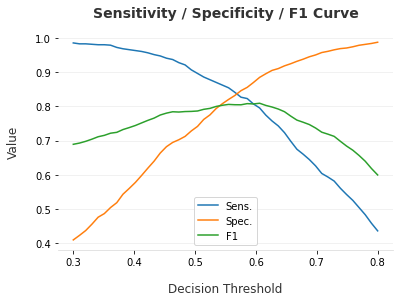

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.841
Confidence Interval: [0.817, 0.865]
-------------------------------------
Specificity: 
Mean: 0.831
Confidence Interval: [0.810, 0.852]
-------------------------------------
f1: 
Mean: 0.805
Confidence Interval: [0.783, 0.827]
-------------------------------------
auc: 
Mean: 0.920
Confidence Interval: [0.907, 0.932]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.900
Confidence Interval: [0.878, 0.921]
-------------------------------------
Specificity: 
Mean: 0.736
Confidence Interval: [0.711, 0.760]
-------------------------------------


/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.969 (0.969)	Loss 0.0644 (0.0644)	Sensitivity 0.833 (0.833)	Specificity 0.800 (0.800)	F1 0.769 (0.769)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.224 (0.296)	Loss 0.0310 (0.0485)	Sensitivity 0.909 (0.844)	Specificity 0.857 (0.792)	F1 0.833 (0.785)	Accuracy 0.875 (0.812)	
Val: [20/60]	Time 0.229 (0.263)	Loss 0.0268 (0.0466)	Sensitivity 1.000 (0.882)	Specificity 0.762 (0.778)	F1 0.815 (0.802)	Accuracy 0.844 (0.821)	
Val: [30/60]	Time 0.227 (0.251)	Loss 0.0297 (0.0417)	Sensitivity 0.882 (0.904)	Specificity 0.867 (0.791)	F1 0.882 (0.822)	Accuracy 0.875 (0.838)	
Val: [40/60]	Time 0.233 (0.246)	Loss 0.0545 (0.0426)	Sensitivity 0.818 (0.896)	Specificity 0.667 (0.781)	F1 0.667 (0.810)	Accuracy 0.719 (0.829)	
Val: [50/60]	Time 0.229 (0.242)	Loss 0.0312 (0.0416)	Sensitivity 1.000 (0.895)	Specificity 0.667 (0.789)	F1 0.824 (0.811)	Accuracy 0.812 (0.833)	
 * Sensitivity 0.895 Specificity 0.795 F1 0.810 Acc 0.834 ROC AUC 0.926


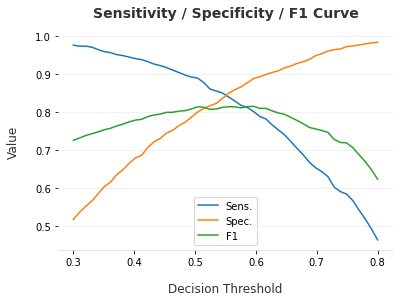

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.555
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.840
Confidence Interval: [0.812, 0.866]
-------------------------------------
Specificity: 
Mean: 0.849
Confidence Interval: [0.827, 0.870]
-------------------------------------
f1: 
Mean: 0.814
Confidence Interval: [0.792, 0.835]
-------------------------------------
auc: 
Mean: 0.926
Confidence Interval: [0.914, 0.937]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.892
Confidence Interval: [0.869, 0.916]
-------------------------------------
Specificity: 
Mean: 0.795
Confidence Interval: [0.772, 0.818]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.898 (0.898)	Loss 0.0353 (0.0353)	Sensitivity 1.000 (1.000)	Specificity 0.700 (0.700)	F1 0.800 (0.800)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.228 (0.291)	Loss 0.0215 (0.0324)	Sensitivity 1.000 (0.932)	Specificity 0.826 (0.793)	F1 0.818 (0.829)	Accuracy 0.875 (0.849)	
Val: [20/60]	Time 0.229 (0.262)	Loss 0.0512 (0.0348)	Sensitivity 0.812 (0.928)	Specificity 0.875 (0.769)	F1 0.839 (0.810)	Accuracy 0.844 (0.832)	
Val: [30/60]	Time 0.230 (0.252)	Loss 0.0218 (0.0351)	Sensitivity 1.000 (0.925)	Specificity 0.937 (0.771)	F1 0.970 (0.805)	Accuracy 0.969 (0.831)	
Val: [40/60]	Time 0.231 (0.247)	Loss 0.0336 (0.0382)	Sensitivity 0.867 (0.914)	Specificity 0.824 (0.758)	F1 0.839 (0.798)	Accuracy 0.844 (0.820)	
Val: [50/60]	Time 0.231 (0.244)	Loss 0.0556 (0.0392)	Sensitivity 0.917 (0.904)	Specificity 0.750 (0.754)	F1 0.786 (0.789)	Accuracy 0.812 (0.814)	
 * Sensitivity 0.907 Specificity 0.760 F1 0.796 Acc 0.819 ROC AUC 0.929


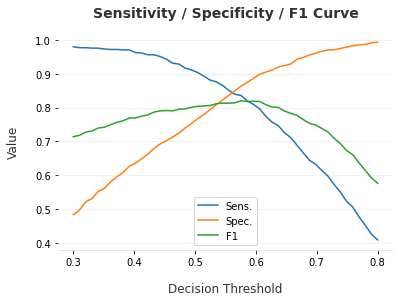

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.840
Confidence Interval: [0.814, 0.866]
-------------------------------------
Specificity: 
Mean: 0.850
Confidence Interval: [0.828, 0.870]
-------------------------------------
f1: 
Mean: 0.814
Confidence Interval: [0.792, 0.835]
-------------------------------------
auc: 
Mean: 0.929
Confidence Interval: [0.917, 0.941]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.906
Confidence Interval: [0.884, 0.925]
-------------------------------------
Specificity: 
Mean: 0.761
Confidence Interval: [0.736, 0.787]
-------------------------------------
f1: 

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.817 (0.817)	Loss 0.0357 (0.0357)	Sensitivity 0.875 (0.875)	Specificity 0.875 (0.875)	F1 0.875 (0.875)	Accuracy 0.875 (0.875)	
Val: [10/60]	Time 0.236 (0.290)	Loss 0.0434 (0.0397)	Sensitivity 0.812 (0.890)	Specificity 0.812 (0.796)	F1 0.812 (0.815)	Accuracy 0.812 (0.835)	
Val: [20/60]	Time 0.235 (0.263)	Loss 0.0313 (0.0379)	Sensitivity 1.000 (0.914)	Specificity 0.792 (0.780)	F1 0.762 (0.808)	Accuracy 0.844 (0.832)	
Val: [30/60]	Time 0.233 (0.253)	Loss 0.0310 (0.0386)	Sensitivity 0.933 (0.910)	Specificity 0.941 (0.787)	F1 0.933 (0.815)	Accuracy 0.938 (0.836)	
Val: [40/60]	Time 0.233 (0.249)	Loss 0.0388 (0.0380)	Sensitivity 0.917 (0.910)	Specificity 0.850 (0.779)	F1 0.846 (0.809)	Accuracy 0.875 (0.831)	
Val: [50/60]	Time 0.234 (0.246)	Loss 0.0521 (0.0378)	Sensitivity 0.889 (0.915)	Specificity 0.696 (0.774)	F1 0.667 (0.807)	Accuracy 0.750 (0.829)	
 * Sensitivity 0.915 Specificity 0.779 F1 0.812 Acc 0.833 ROC AUC 0.933


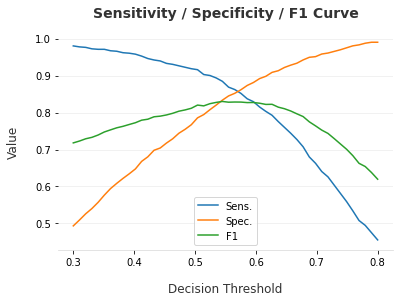

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.576
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.852
Confidence Interval: [0.827, 0.876]
-------------------------------------
Specificity: 
Mean: 0.862
Confidence Interval: [0.842, 0.883]
-------------------------------------
f1: 
Mean: 0.829
Confidence Interval: [0.809, 0.849]
-------------------------------------
auc: 
Mean: 0.933
Confidence Interval: [0.922, 0.944]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.916
Confidence Interval: [0.896, 0.935]
-------------------------------------
Specificity: 
Mean: 0.777
Confidence Interval: [0.752, 0.801]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.930 (0.930)	Loss 0.0190 (0.0190)	Sensitivity 1.000 (1.000)	Specificity 0.895 (0.895)	F1 0.929 (0.929)	Accuracy 0.938 (0.938)	
Val: [10/60]	Time 0.236 (0.302)	Loss 0.0422 (0.0312)	Sensitivity 0.889 (0.935)	Specificity 0.696 (0.796)	F1 0.667 (0.832)	Accuracy 0.750 (0.852)	
Val: [20/60]	Time 0.237 (0.270)	Loss 0.0432 (0.0378)	Sensitivity 0.909 (0.909)	Specificity 0.762 (0.790)	F1 0.769 (0.821)	Accuracy 0.812 (0.838)	
Val: [30/60]	Time 0.236 (0.260)	Loss 0.0300 (0.0358)	Sensitivity 0.917 (0.914)	Specificity 0.800 (0.779)	F1 0.815 (0.821)	Accuracy 0.844 (0.835)	
Val: [40/60]	Time 0.238 (0.254)	Loss 0.0116 (0.0397)	Sensitivity 0.900 (0.894)	Specificity 1.000 (0.787)	F1 0.947 (0.809)	Accuracy 0.969 (0.830)	
Val: [50/60]	Time 0.239 (0.251)	Loss 0.0450 (0.0400)	Sensitivity 0.846 (0.886)	Specificity 0.842 (0.804)	F1 0.815 (0.812)	Accuracy 0.844 (0.836)	
 * Sensitivity 0.885 Specificity 0.808 F1 0.815 Acc 0.838 ROC AUC 0.930


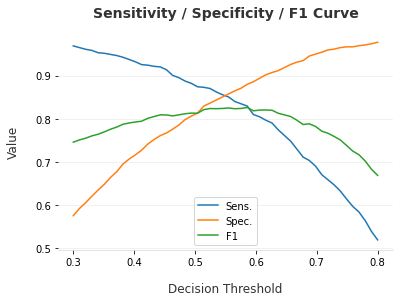

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.545
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.856
Confidence Interval: [0.831, 0.880]
-------------------------------------
Specificity: 
Mean: 0.850
Confidence Interval: [0.829, 0.871]
-------------------------------------
f1: 
Mean: 0.824
Confidence Interval: [0.804, 0.846]
-------------------------------------
auc: 
Mean: 0.930
Confidence Interval: [0.918, 0.942]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.879
Confidence Interval: [0.855, 0.901]
-------------------------------------
Specificity: 
Mean: 0.810
Confidence Interval: [0.789, 0.831]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.855 (0.855)	Loss 0.0486 (0.0486)	Sensitivity 0.857 (0.857)	Specificity 0.722 (0.722)	F1 0.774 (0.774)	Accuracy 0.781 (0.781)	
Val: [10/60]	Time 0.230 (0.288)	Loss 0.0489 (0.0375)	Sensitivity 0.818 (0.886)	Specificity 0.762 (0.786)	F1 0.720 (0.806)	Accuracy 0.781 (0.830)	
Val: [20/60]	Time 0.229 (0.260)	Loss 0.0345 (0.0395)	Sensitivity 0.923 (0.890)	Specificity 0.789 (0.792)	F1 0.828 (0.800)	Accuracy 0.844 (0.826)	
Val: [30/60]	Time 0.228 (0.251)	Loss 0.0283 (0.0400)	Sensitivity 0.933 (0.889)	Specificity 0.706 (0.791)	F1 0.824 (0.802)	Accuracy 0.812 (0.829)	
Val: [40/60]	Time 0.230 (0.246)	Loss 0.0177 (0.0395)	Sensitivity 1.000 (0.896)	Specificity 0.810 (0.786)	F1 0.846 (0.803)	Accuracy 0.875 (0.830)	
Val: [50/60]	Time 0.233 (0.243)	Loss 0.0594 (0.0393)	Sensitivity 0.929 (0.899)	Specificity 0.667 (0.778)	F1 0.788 (0.804)	Accuracy 0.781 (0.828)	
 * Sensitivity 0.902 Specificity 0.773 F1 0.798 Acc 0.825 ROC AUC 0.925


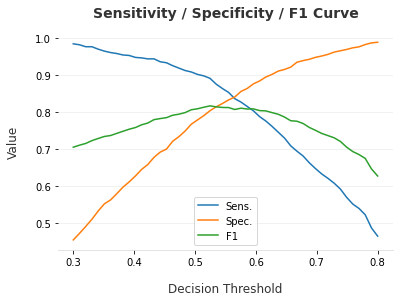

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.836
Confidence Interval: [0.811, 0.862]
-------------------------------------
Specificity: 
Mean: 0.840
Confidence Interval: [0.819, 0.861]
-------------------------------------
f1: 
Mean: 0.807
Confidence Interval: [0.785, 0.826]
-------------------------------------
auc: 
Mean: 0.924
Confidence Interval: [0.913, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.904
Confidence Interval: [0.883, 0.925]
-------------------------------------
Specificity: 
Mean: 0.771
Confidence Interval: [0.746, 0.796]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 0.841 (0.841)	Loss 0.0378 (0.0378)	Sensitivity 0.750 (0.750)	Specificity 0.792 (0.792)	F1 0.632 (0.632)	Accuracy 0.781 (0.781)	
Val: [10/60]	Time 0.233 (0.288)	Loss 0.0180 (0.0388)	Sensitivity 1.000 (0.873)	Specificity 0.818 (0.741)	F1 0.833 (0.768)	Accuracy 0.875 (0.798)	
Val: [20/60]	Time 0.235 (0.260)	Loss 0.0495 (0.0414)	Sensitivity 0.909 (0.856)	Specificity 0.762 (0.761)	F1 0.769 (0.763)	Accuracy 0.812 (0.802)	
Val: [30/60]	Time 0.232 (0.251)	Loss 0.0560 (0.0455)	Sensitivity 0.615 (0.833)	Specificity 0.895 (0.784)	F1 0.696 (0.765)	Accuracy 0.781 (0.803)	
Val: [40/60]	Time 0.232 (0.247)	Loss 0.0355 (0.0431)	Sensitivity 0.923 (0.847)	Specificity 0.895 (0.795)	F1 0.889 (0.781)	Accuracy 0.906 (0.816)	
Val: [50/60]	Time 0.234 (0.244)	Loss 0.0417 (0.0419)	Sensitivity 0.900 (0.852)	Specificity 0.818 (0.795)	F1 0.783 (0.783)	Accuracy 0.844 (0.817)	
 * Sensitivity 0.856 Specificity 0.801 F1 0.790 Acc 0.823 ROC AUC 0.919


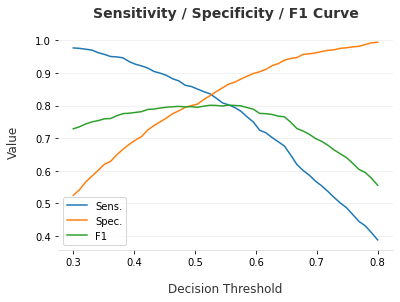

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.524
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.837
Confidence Interval: [0.811, 0.862]
-------------------------------------
Specificity: 
Mean: 0.830
Confidence Interval: [0.806, 0.850]
-------------------------------------
f1: 
Mean: 0.801
Confidence Interval: [0.780, 0.822]
-------------------------------------
auc: 
Mean: 0.919
Confidence Interval: [0.907, 0.930]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.853
Confidence Interval: [0.828, 0.878]
-------------------------------------
Specificity: 
Mean: 0.803
Confidence Interval: [0.780, 0.824]
-------------------------------------
f1: 
M

In [ ]:
# iteratively for each model, find best threshold so that sens and spec are close enough
# save the best thresholds for evaluation on the test set

t_list = []
for i in range(len(weight_list)):
    wi = weight_list[i]
    model = model_names[i]
    conf = tune_config(wi, model)
    # finding best threshold for a given model
    # print bootstrap results on the validation data
    best_t = threshold_tuning(conf)
    t_list.append(best_t)

print('best thresholds: ', t_list)

In [ ]:
# bootstrap iterations
itr = 1000
# metrics
metrics = ['sen', 'spe', 'auc', 'f1']
# confidence interval alpha
alpha = 0.05
results_path = 'results/auc_3/'

In [ ]:
# print bootstrap results on the test data
te_best = test_evaluations(weight_list, t_list, metrics, model_names, results_path, itr, alpha)
te_best.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 8.225 (8.225)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.649 (2.291)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 6.374 (2.265)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.368 (2.058)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 6.581 (2.094)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.234 (2.067)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.844 (0.844)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.243 (0.297)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.241 (0.270)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.240 (0.261)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.241 (0.256)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.240 (0.253)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.743 (0.743)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.240 (0.288)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.239 (0.266)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.240 (0.257)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.236 (0.253)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.236 (0.250)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.868 (0.868)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.237 (0.297)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.236 (0.268)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.235 (0.258)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.235 (0.253)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.236 (0.249)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.839 (0.839)	Loss 0.0288 (0.0288)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.238 (0.295)	Loss 0.0281 (0.0301)	Accuracy 0.781 (0.847)	
Test: [20/59]	Time 0.239 (0.267)	Loss 0.0258 (0.0260)	Accuracy 0.844 (0.872)	
Test: [30/59]	Time 0.235 (0.257)	Loss 0.0181 (0.0294)	Accuracy 0.938 (0.844)	
Test: [40/59]	Time 0.236 (0.252)	Loss 0.0211 (0.0316)	Accuracy 0.906 (0.846)	
Test: [50/59]	Time 0.235 (0.249)	Loss 0.0247 (0.0347)	Accuracy 0.938 (0.857)	
 * Acc 0.859 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.781 (0.781)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.237 (0.291)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.237 (0.266)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.240 (0.257)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.240 (0.253)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.238 (0.250)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.821 (0.821)	Loss 0.0351 (0.0351)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.236 (0.295)	Loss 0.0257 (0.0266)	Accuracy 0.781 (0.812)	
Test: [20/59]	Time 0.237 (0.268)	Loss 0.0164 (0.0257)	Accuracy 0.875 (0.851)	
Test: [30/59]	Time 0.238 (0.259)	Loss 0.0240 (0.0281)	Accuracy 0.844 (0.825)	
Test: [40/59]	Time 0.242 (0.254)	Loss 0.0593 (0.0328)	Accuracy 0.906 (0.833)	
Test: [50/59]	Time 0.239 (0.251)	Loss 0.0365 (0.0370)	Accuracy 0.938 (0.843)	


  0%|          | 3/1000 [00:00<00:44, 22.38it/s]

 * Acc 0.843 ROC AUC 0.929


100%|██████████| 1000/1000 [00:42<00:00, 23.37it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.869
Confidence Interval: [0.844, 0.892]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.846
Confidence Interval: [0.824, 0.866]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.932
Confidence Interval: [0.921, 0.943]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.828
Confidence Interval: [0.808, 0.848]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.860
Confidence Interval: [0.834, 0.883]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

Normal test for baseline model: 
p_normal value:  0.03534165769815445
Normal test: 
p_normal value:  0.006576154381036758
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 28.630378168474486
p: 1.4197168345317927e-151
************************************************************


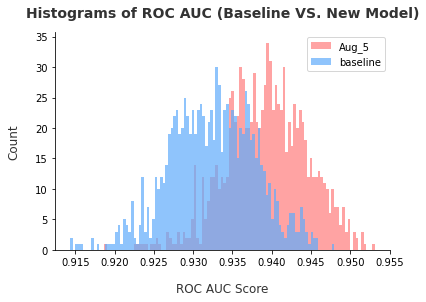

Normal test: 
p_normal value:  0.1702663153409958
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 6.3303288498472865
p: 1.506395094867887e-10
************************************************************


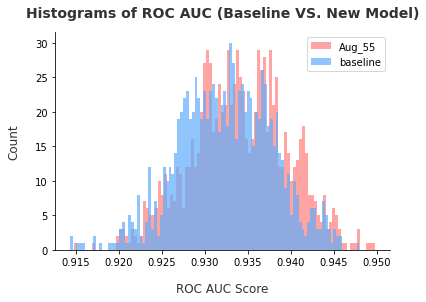

Normal test: 
p_normal value:  0.01878594048321247
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 50.48266252831177
p: 0.0
************************************************************


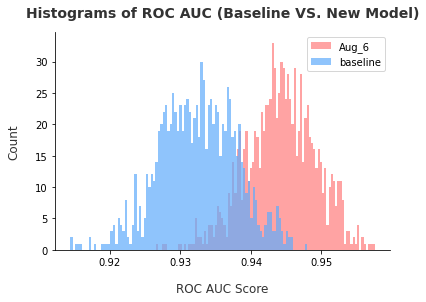

Normal test: 
p_normal value:  0.2895297706127167
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 26.207347767526613
p: 1.3236843609081617e-130
************************************************************


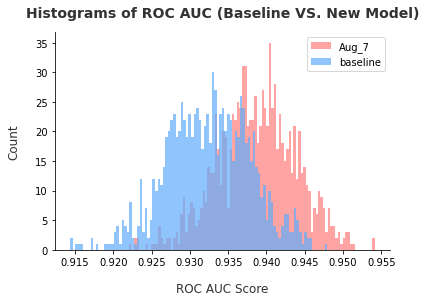

Normal test: 
p_normal value:  0.12550561130046844
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 6.090034259429533
p: 6.751594073862702e-10
************************************************************


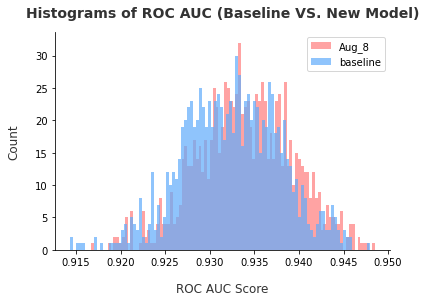

Normal test: 
p_normal value:  0.1770506203174591
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: -13.333999992771279
p: 3.237840466323575e-39
************************************************************


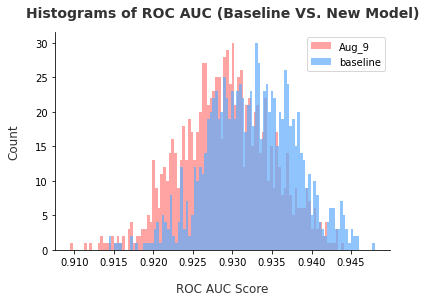

In [ ]:
# T test of ROC AUC and histograms of ROC AUC for all new models (compared with the baseline)
# p value << 0.05 shows that the differences between the AUC scores are statistically signficant
te_best.t_test_auc()

Normal test for baseline model: 
p_normal value:  0.2651091516017914
Normal test: 
p_normal value:  0.30673450231552124
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 26.745487661294945
p: 2.9455508095703974e-135
************************************************************


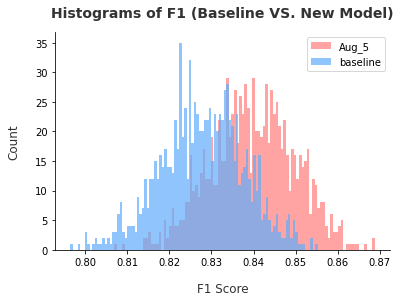

Normal test: 
p_normal value:  0.2407166063785553
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 13.10827150433266
p: 5.073294532449046e-38
************************************************************


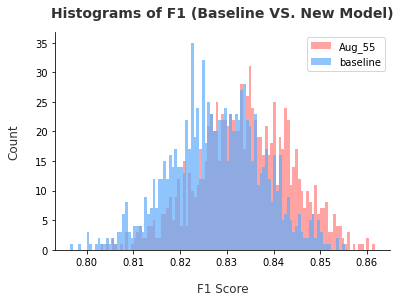

Normal test: 
p_normal value:  0.13465501368045807
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 40.3647455608847
p: 2.4765820804966745e-261
************************************************************


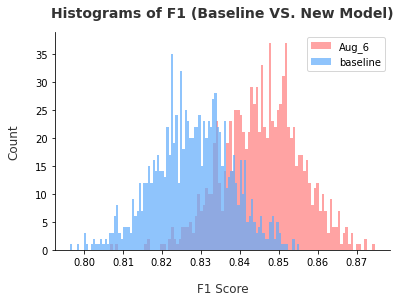

Normal test: 
p_normal value:  0.055087413638830185
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 27.664931884914694
p: 3.4493549438446376e-143
************************************************************


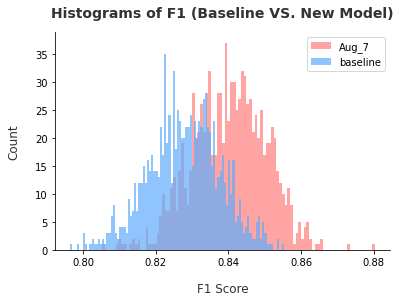

Normal test: 
p_normal value:  0.7085151076316833
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 18.277096718766902
p: 1.981715868819077e-69
************************************************************


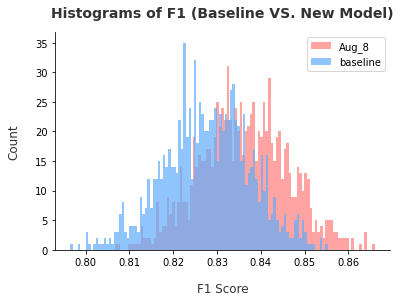

Normal test: 
p_normal value:  0.015737958252429962
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: -3.972326995919778
p: 3.684877598037986e-05
************************************************************


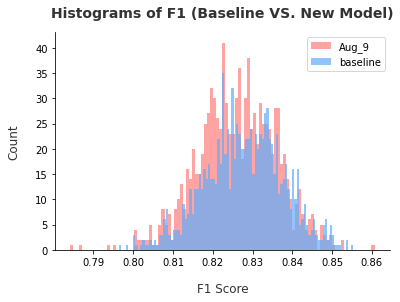

In [ ]:
te_best.t_test_f1()

In [ ]:
# default threshold = 0.5
default_t_list = [0.5] * 7
te_default = test_evaluations(weight_list, default_t_list, metrics, model_names, results_path, itr, alpha)
te_default.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.728 (0.728)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.232 (0.279)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 0.231 (0.256)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.232 (0.248)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 0.231 (0.244)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.232 (0.242)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.723 (0.723)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.233 (0.284)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.234 (0.261)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.237 (0.253)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.238 (0.249)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.236 (0.246)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.982 (0.982)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.239 (0.348)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.242 (0.296)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.240 (0.278)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.240 (0.269)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.240 (0.264)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.837 (0.837)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.242 (0.299)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.241 (0.272)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.240 (0.262)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.236 (0.256)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.237 (0.253)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.835 (0.835)	Loss 0.0288 (0.0288)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.236 (0.294)	Loss 0.0281 (0.0301)	Accuracy 0.781 (0.847)	
Test: [20/59]	Time 0.237 (0.267)	Loss 0.0258 (0.0260)	Accuracy 0.844 (0.872)	
Test: [30/59]	Time 0.235 (0.257)	Loss 0.0181 (0.0294)	Accuracy 0.938 (0.844)	
Test: [40/59]	Time 0.235 (0.252)	Loss 0.0211 (0.0316)	Accuracy 0.906 (0.846)	
Test: [50/59]	Time 0.233 (0.248)	Loss 0.0247 (0.0347)	Accuracy 0.938 (0.857)	
 * Acc 0.859 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.797 (0.797)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.238 (0.291)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.237 (0.265)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.235 (0.255)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.236 (0.251)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.233 (0.248)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-2235_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 0.748 (0.748)	Loss 0.0351 (0.0351)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.236 (0.289)	Loss 0.0257 (0.0266)	Accuracy 0.781 (0.812)	
Test: [20/59]	Time 0.236 (0.263)	Loss 0.0164 (0.0257)	Accuracy 0.875 (0.851)	
Test: [30/59]	Time 0.236 (0.255)	Loss 0.0240 (0.0281)	Accuracy 0.844 (0.825)	
Test: [40/59]	Time 0.237 (0.250)	Loss 0.0593 (0.0328)	Accuracy 0.906 (0.833)	
Test: [50/59]	Time 0.237 (0.247)	Loss 0.0365 (0.0370)	Accuracy 0.938 (0.843)	


  0%|          | 3/1000 [00:00<00:41, 24.12it/s]

 * Acc 0.843 ROC AUC 0.929


100%|██████████| 1000/1000 [00:42<00:00, 23.51it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.921
Confidence Interval: [0.901, 0.939]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.753
Confidence Interval: [0.727, 0.779]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.933
Confidence Interval: [0.921, 0.944]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.805
Confidence Interval: [0.783, 0.825]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.896
Confidence Interval: [0.874, 0.917]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

In [4]:
#re evaluate 0.9
#re evaluate auc's models
class tune_config:
    path_data = 'data/'
    arch = 'drn_c_26'
    workers = 4
    batch_size = 32
    print_freq = 10
    pretrained = 0
    crop_size = 224
    scale_size = 256
    results_path = 'results/auc_4/'
    bootstrap_itr = 1000
    bootstrap_alpha = 0.05
    def __init__(self, weights, model_name):
        self.load_weights = weights
        self.model_name = model_name


# trained models ready for evaluation
weight_list = ['classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar', 
          'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar',
          'classify_01_models/classify_20200730-2156_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'] 

# names of the models (for display results only)
model_names = ['Baseline', 'Aug_5', 'Aug_55', 'Aug_6', 'Aug_7', 'Aug_8', 'Aug_9']



=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of cuda is deprecated:
	cuda(torch.device device, bool async, *, torch.memory_format memory_format)
Consider using one of the following signatures instead:
	cuda(torch.device device, bool non_blocking, *, torch.memory_format memory_format)
/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 18.317 (18.317)	Loss 0.0265 (0.0265)	Sensitivity 0.875 (0.875)	Specificity 0.750 (0.750)	F1 0.667 (0.667)	Accuracy 0.781 (0.781)	
Val: [10/60]	Time 0.621 (4.396)	Loss 0.0744 (0.0432)	Sensitivity 0.850 (0.888)	Specificity 0.667 (0.711)	F1 0.829 (0.759)	Accuracy 0.781 (0.781)	
Val: [20/60]	Time 13.789 (4.431)	Loss 0.0535 (0.0399)	Sensitivity 0.867 (0.903)	Specificity 0.647 (0.727)	F1 0.765 (0.781)	Accuracy 0.750 (0.799)	
Val: [30/60]	Time 0.617 (4.031)	Loss 0.0479 (0.0400)	Sensitivity 0.700 (0.901)	Specificity 0.727 (0.732)	F1 0.609 (0.781)	Accuracy 0.719 (0.801)	
Val: [40/60]	Time 13.093 (4.112)	Loss 0.0458 (0.0399)	Sensitivity 0.875 (0.899)	Specificity 0.750 (0.736)	F1 0.824 (0.784)	Accuracy 0.812 (0.803)	
Val: [50/60]	Time 0.618 (3.912)	Loss 0.0520 (0.0394)	Sensitivity 0.727 (0.902)	Specificity 0.476 (0.737)	F1 0.533 (0.782)	Accuracy 0.562 (0.804)	
 * Sensitivity 0.899 Specificity 0.737 F1 0.777 Acc 0.802 ROC AUC 0.920


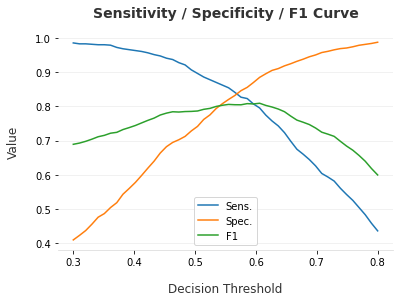

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.841
Confidence Interval: [0.817, 0.866]
-------------------------------------
Specificity: 
Mean: 0.831
Confidence Interval: [0.809, 0.854]
-------------------------------------
f1: 
Mean: 0.804
Confidence Interval: [0.783, 0.825]
-------------------------------------
auc: 
Mean: 0.920
Confidence Interval: [0.908, 0.931]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Baseline
-------------------------------------
Sensitivity: 
Mean: 0.900
Confidence Interval: [0.880, 0.921]
-------------------------------------
Specificity: 
Mean: 0.736
Confidence Interval: [0.709, 0.763]
-------------------------------------


/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.211 (1.211)	Loss 0.0397 (0.0397)	Sensitivity 0.800 (0.800)	Specificity 0.818 (0.818)	F1 0.727 (0.727)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.626 (0.679)	Loss 0.0450 (0.0407)	Sensitivity 0.900 (0.898)	Specificity 0.636 (0.729)	F1 0.667 (0.761)	Accuracy 0.719 (0.795)	
Val: [20/60]	Time 0.616 (0.650)	Loss 0.0324 (0.0425)	Sensitivity 0.944 (0.880)	Specificity 0.786 (0.769)	F1 0.895 (0.782)	Accuracy 0.875 (0.814)	
Val: [30/60]	Time 0.615 (0.640)	Loss 0.0442 (0.0408)	Sensitivity 0.923 (0.887)	Specificity 0.632 (0.779)	F1 0.750 (0.791)	Accuracy 0.750 (0.823)	
Val: [40/60]	Time 0.616 (0.634)	Loss 0.0331 (0.0394)	Sensitivity 0.846 (0.895)	Specificity 0.842 (0.792)	F1 0.815 (0.803)	Accuracy 0.844 (0.833)	
Val: [50/60]	Time 0.611 (0.631)	Loss 0.0480 (0.0394)	Sensitivity 0.933 (0.895)	Specificity 0.765 (0.796)	F1 0.848 (0.807)	Accuracy 0.844 (0.835)	
 * Sensitivity 0.892 Specificity 0.797 F1 0.807 Acc 0.834 ROC AUC 0.926


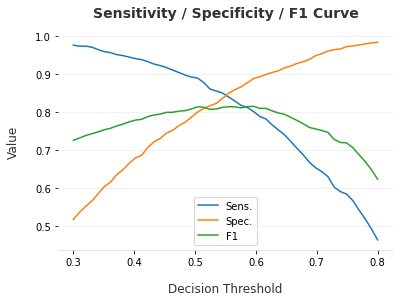

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.555
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.840
Confidence Interval: [0.812, 0.866]
-------------------------------------
Specificity: 
Mean: 0.850
Confidence Interval: [0.830, 0.872]
-------------------------------------
f1: 
Mean: 0.814
Confidence Interval: [0.793, 0.837]
-------------------------------------
auc: 
Mean: 0.926
Confidence Interval: [0.914, 0.937]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_5
-------------------------------------
Sensitivity: 
Mean: 0.892
Confidence Interval: [0.869, 0.914]
-------------------------------------
Specificity: 
Mean: 0.796
Confidence Interval: [0.771, 0.819]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.245 (1.245)	Loss 0.0446 (0.0446)	Sensitivity 0.937 (0.937)	Specificity 0.750 (0.750)	F1 0.857 (0.857)	Accuracy 0.844 (0.844)	
Val: [10/60]	Time 0.613 (0.673)	Loss 0.0323 (0.0355)	Sensitivity 1.000 (0.922)	Specificity 0.765 (0.786)	F1 0.882 (0.834)	Accuracy 0.875 (0.844)	
Val: [20/60]	Time 0.628 (0.648)	Loss 0.0314 (0.0378)	Sensitivity 1.000 (0.917)	Specificity 0.792 (0.780)	F1 0.762 (0.811)	Accuracy 0.844 (0.833)	
Val: [30/60]	Time 0.621 (0.638)	Loss 0.0382 (0.0376)	Sensitivity 0.846 (0.919)	Specificity 0.737 (0.765)	F1 0.759 (0.801)	Accuracy 0.781 (0.825)	
Val: [40/60]	Time 0.617 (0.633)	Loss 0.0384 (0.0372)	Sensitivity 0.867 (0.914)	Specificity 0.824 (0.775)	F1 0.839 (0.805)	Accuracy 0.844 (0.829)	
Val: [50/60]	Time 0.621 (0.630)	Loss 0.0226 (0.0364)	Sensitivity 0.929 (0.915)	Specificity 0.944 (0.764)	F1 0.929 (0.798)	Accuracy 0.938 (0.823)	
 * Sensitivity 0.906 Specificity 0.761 F1 0.796 Acc 0.819 ROC AUC 0.929


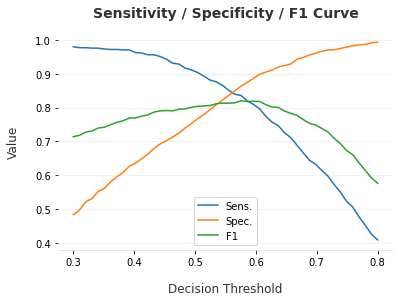

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.841
Confidence Interval: [0.813, 0.866]
-------------------------------------
Specificity: 
Mean: 0.849
Confidence Interval: [0.828, 0.870]
-------------------------------------
f1: 
Mean: 0.815
Confidence Interval: [0.793, 0.836]
-------------------------------------
auc: 
Mean: 0.929
Confidence Interval: [0.918, 0.940]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_55
-------------------------------------
Sensitivity: 
Mean: 0.905
Confidence Interval: [0.885, 0.924]
-------------------------------------
Specificity: 
Mean: 0.761
Confidence Interval: [0.736, 0.786]
-------------------------------------
f1: 

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.353 (1.353)	Loss 0.0247 (0.0247)	Sensitivity 1.000 (1.000)	Specificity 0.857 (0.857)	F1 0.880 (0.880)	Accuracy 0.906 (0.906)	
Val: [10/60]	Time 0.623 (0.684)	Loss 0.0199 (0.0405)	Sensitivity 1.000 (0.910)	Specificity 0.889 (0.786)	F1 0.933 (0.804)	Accuracy 0.938 (0.830)	
Val: [20/60]	Time 0.618 (0.653)	Loss 0.0253 (0.0412)	Sensitivity 0.933 (0.893)	Specificity 0.941 (0.767)	F1 0.933 (0.792)	Accuracy 0.938 (0.814)	
Val: [30/60]	Time 0.608 (0.642)	Loss 0.0359 (0.0393)	Sensitivity 0.923 (0.908)	Specificity 0.789 (0.769)	F1 0.828 (0.801)	Accuracy 0.844 (0.823)	
Val: [40/60]	Time 0.624 (0.636)	Loss 0.0674 (0.0388)	Sensitivity 0.786 (0.911)	Specificity 0.833 (0.771)	F1 0.786 (0.801)	Accuracy 0.812 (0.825)	
Val: [50/60]	Time 0.616 (0.632)	Loss 0.0227 (0.0373)	Sensitivity 1.000 (0.917)	Specificity 0.789 (0.774)	F1 0.867 (0.809)	Accuracy 0.875 (0.831)	
 * Sensitivity 0.916 Specificity 0.777 F1 0.809 Acc 0.833 ROC AUC 0.933


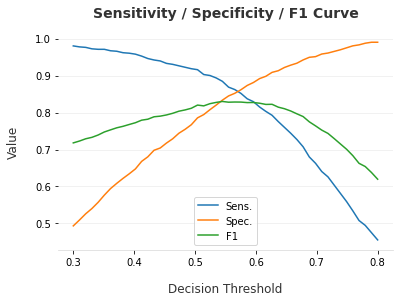

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.576
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.852
Confidence Interval: [0.827, 0.877]
-------------------------------------
Specificity: 
Mean: 0.863
Confidence Interval: [0.842, 0.883]
-------------------------------------
f1: 
Mean: 0.829
Confidence Interval: [0.808, 0.849]
-------------------------------------
auc: 
Mean: 0.933
Confidence Interval: [0.923, 0.944]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_6
-------------------------------------
Sensitivity: 
Mean: 0.916
Confidence Interval: [0.896, 0.935]
-------------------------------------
Specificity: 
Mean: 0.777
Confidence Interval: [0.752, 0.801]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.415 (1.415)	Loss 0.0572 (0.0572)	Sensitivity 0.812 (0.812)	Specificity 0.937 (0.937)	F1 0.867 (0.867)	Accuracy 0.875 (0.875)	
Val: [10/60]	Time 0.624 (0.690)	Loss 0.0763 (0.0546)	Sensitivity 0.929 (0.819)	Specificity 0.722 (0.834)	F1 0.812 (0.782)	Accuracy 0.812 (0.827)	
Val: [20/60]	Time 0.615 (0.656)	Loss 0.0337 (0.0482)	Sensitivity 1.000 (0.857)	Specificity 0.722 (0.822)	F1 0.848 (0.798)	Accuracy 0.844 (0.835)	
Val: [30/60]	Time 0.615 (0.644)	Loss 0.0470 (0.0456)	Sensitivity 0.700 (0.863)	Specificity 0.909 (0.823)	F1 0.737 (0.808)	Accuracy 0.844 (0.841)	
Val: [40/60]	Time 0.618 (0.638)	Loss 0.0354 (0.0453)	Sensitivity 1.000 (0.864)	Specificity 0.714 (0.816)	F1 0.786 (0.801)	Accuracy 0.812 (0.836)	
Val: [50/60]	Time 0.624 (0.634)	Loss 0.0349 (0.0434)	Sensitivity 0.909 (0.873)	Specificity 0.857 (0.809)	F1 0.833 (0.803)	Accuracy 0.875 (0.837)	
 * Sensitivity 0.876 Specificity 0.807 F1 0.804 Acc 0.838 ROC AUC 0.930


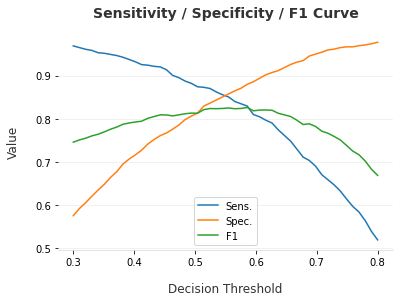

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.545
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.856
Confidence Interval: [0.830, 0.882]
-------------------------------------
Specificity: 
Mean: 0.850
Confidence Interval: [0.829, 0.871]
-------------------------------------
f1: 
Mean: 0.824
Confidence Interval: [0.802, 0.843]
-------------------------------------
auc: 
Mean: 0.930
Confidence Interval: [0.919, 0.942]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_7
-------------------------------------
Sensitivity: 
Mean: 0.879
Confidence Interval: [0.854, 0.902]
-------------------------------------
Specificity: 
Mean: 0.811
Confidence Interval: [0.788, 0.833]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.406 (1.406)	Loss 0.0275 (0.0275)	Sensitivity 0.929 (0.929)	Specificity 0.833 (0.833)	F1 0.867 (0.867)	Accuracy 0.875 (0.875)	
Val: [10/60]	Time 0.614 (0.688)	Loss 0.0233 (0.0353)	Sensitivity 0.923 (0.912)	Specificity 0.842 (0.809)	F1 0.857 (0.817)	Accuracy 0.875 (0.847)	
Val: [20/60]	Time 0.613 (0.655)	Loss 0.0316 (0.0371)	Sensitivity 1.000 (0.914)	Specificity 0.696 (0.772)	F1 0.720 (0.784)	Accuracy 0.781 (0.823)	
Val: [30/60]	Time 0.618 (0.643)	Loss 0.0428 (0.0404)	Sensitivity 0.857 (0.905)	Specificity 0.889 (0.767)	F1 0.857 (0.791)	Accuracy 0.875 (0.820)	
Val: [40/60]	Time 0.624 (0.637)	Loss 0.0366 (0.0398)	Sensitivity 0.895 (0.911)	Specificity 0.769 (0.764)	F1 0.872 (0.797)	Accuracy 0.844 (0.821)	
Val: [50/60]	Time 0.615 (0.633)	Loss 0.0356 (0.0397)	Sensitivity 0.909 (0.908)	Specificity 0.762 (0.772)	F1 0.769 (0.802)	Accuracy 0.812 (0.825)	
 * Sensitivity 0.906 Specificity 0.774 F1 0.802 Acc 0.825 ROC AUC 0.925


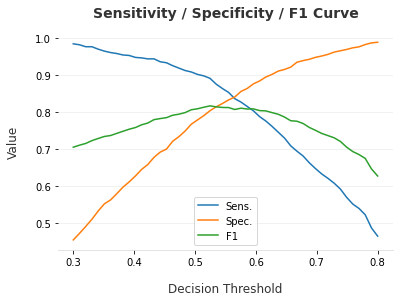

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.565
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.836
Confidence Interval: [0.811, 0.862]
-------------------------------------
Specificity: 
Mean: 0.841
Confidence Interval: [0.819, 0.862]
-------------------------------------
f1: 
Mean: 0.807
Confidence Interval: [0.785, 0.829]
-------------------------------------
auc: 
Mean: 0.925
Confidence Interval: [0.913, 0.936]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_8
-------------------------------------
Sensitivity: 
Mean: 0.904
Confidence Interval: [0.883, 0.924]
-------------------------------------
Specificity: 
Mean: 0.772
Confidence Interval: [0.748, 0.798]
-------------------------------------
f1: 
M

/content/gdrive/My Drive/final_files/classification/evaluation.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Val: [0/60]	Time 1.385 (1.385)	Loss 0.0401 (0.0401)	Sensitivity 0.846 (0.846)	Specificity 0.789 (0.789)	F1 0.786 (0.786)	Accuracy 0.812 (0.812)	
Val: [10/60]	Time 0.619 (0.687)	Loss 0.0815 (0.0427)	Sensitivity 0.769 (0.859)	Specificity 0.737 (0.794)	F1 0.714 (0.781)	Accuracy 0.750 (0.818)	
Val: [20/60]	Time 0.619 (0.655)	Loss 0.0274 (0.0389)	Sensitivity 0.900 (0.899)	Specificity 0.864 (0.785)	F1 0.818 (0.805)	Accuracy 0.875 (0.830)	
Val: [30/60]	Time 0.615 (0.643)	Loss 0.0307 (0.0413)	Sensitivity 0.714 (0.891)	Specificity 0.920 (0.765)	F1 0.714 (0.785)	Accuracy 0.875 (0.815)	
Val: [40/60]	Time 0.613 (0.636)	Loss 0.0297 (0.0419)	Sensitivity 1.000 (0.886)	Specificity 0.562 (0.760)	F1 0.821 (0.781)	Accuracy 0.781 (0.811)	
Val: [50/60]	Time 0.619 (0.633)	Loss 0.0418 (0.0398)	Sensitivity 0.909 (0.897)	Specificity 0.762 (0.763)	F1 0.769 (0.791)	Accuracy 0.812 (0.819)	
 * Sensitivity 0.894 Specificity 0.759 F1 0.790 Acc 0.815 ROC AUC 0.919


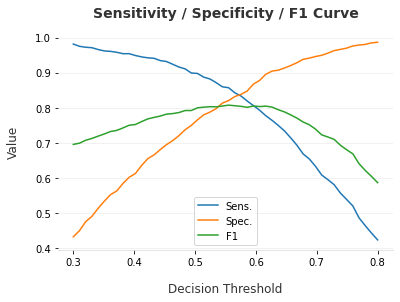

*****************************************************************************
 Bootstrap results on the validation set using the best threshold of 0.576
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.833
Confidence Interval: [0.804, 0.859]
-------------------------------------
Specificity: 
Mean: 0.838
Confidence Interval: [0.815, 0.861]
-------------------------------------
f1: 
Mean: 0.803
Confidence Interval: [0.780, 0.823]
-------------------------------------
auc: 
Mean: 0.919
Confidence Interval: [0.906, 0.930]
-------------------------------------
*****************************************************************************
 Bootstrap results on the validation set using the default threshold of 0.5
Model:  Aug_9
-------------------------------------
Sensitivity: 
Mean: 0.898
Confidence Interval: [0.877, 0.918]
-------------------------------------
Specificity: 
Mean: 0.759
Confidence Interval: [0.735, 0.785]
-------------------------------------
f1: 
M

In [5]:
# iteratively for each model, find best threshold so that sens and spec are close enough
# save the best thresholds for evaluation on the test set

t_list = []
for i in range(len(weight_list)):
    wi = weight_list[i]
    model = model_names[i]
    conf = tune_config(wi, model)
    # finding best threshold for a given model
    # print bootstrap results on the validation data
    best_t = threshold_tuning(conf)
    t_list.append(best_t)

print('best thresholds: ', t_list)

In [6]:
# bootstrap iterations
itr = 1000
# metrics
metrics = ['sen', 'spe', 'auc', 'f1']
# confidence interval alpha
alpha = 0.05
results_path = 'results/auc_4/'

In [7]:
# print bootstrap results on the test data
te_best = test_evaluations(weight_list, t_list, metrics, model_names, results_path, itr, alpha)
te_best.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 16.113 (16.113)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.621 (4.277)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 12.860 (4.298)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.610 (3.889)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 13.090 (4.002)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.614 (3.804)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.274 (1.274)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.613 (0.679)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.618 (0.651)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.619 (0.641)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.614 (0.636)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.621 (0.632)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.254 (1.254)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.612 (0.677)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.623 (0.649)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.617 (0.638)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.619 (0.634)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.614 (0.630)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.336 (1.336)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.621 (0.683)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.619 (0.651)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.622 (0.640)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.613 (0.634)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.607 (0.630)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.321 (1.321)	Loss 0.0288 (0.0288)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.618 (0.682)	Loss 0.0281 (0.0301)	Accuracy 0.781 (0.847)	
Test: [20/59]	Time 0.622 (0.651)	Loss 0.0258 (0.0260)	Accuracy 0.844 (0.872)	
Test: [30/59]	Time 0.615 (0.640)	Loss 0.0181 (0.0294)	Accuracy 0.938 (0.844)	
Test: [40/59]	Time 0.610 (0.634)	Loss 0.0211 (0.0316)	Accuracy 0.906 (0.846)	
Test: [50/59]	Time 0.620 (0.631)	Loss 0.0247 (0.0347)	Accuracy 0.938 (0.857)	
 * Acc 0.859 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.291 (1.291)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.617 (0.678)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.613 (0.648)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.612 (0.639)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.615 (0.634)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.618 (0.630)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200730-2156_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200730-2156_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.311 (1.311)	Loss 0.0317 (0.0317)	Accuracy 0.688 (0.688)	
Test: [10/59]	Time 0.609 (0.680)	Loss 0.0276 (0.0294)	Accuracy 0.688 (0.781)	
Test: [20/59]	Time 0.623 (0.651)	Loss 0.0179 (0.0251)	Accuracy 0.938 (0.832)	
Test: [30/59]	Time 0.618 (0.641)	Loss 0.0277 (0.0304)	Accuracy 0.750 (0.779)	
Test: [40/59]	Time 0.617 (0.635)	Loss 0.0517 (0.0332)	Accuracy 0.875 (0.791)	
Test: [50/59]	Time 0.612 (0.631)	Loss 0.0267 (0.0343)	Accuracy 0.938 (0.818)	


  0%|          | 2/1000 [00:00<00:53, 18.60it/s]

 * Acc 0.831 ROC AUC 0.937


100%|██████████| 1000/1000 [00:55<00:00, 18.11it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.869
Confidence Interval: [0.846, 0.891]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.846
Confidence Interval: [0.825, 0.868]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.933
Confidence Interval: [0.922, 0.943]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.828
Confidence Interval: [0.808, 0.848]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.860
Confidence Interval: [0.837, 0.886]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************

Normal test for baseline model: 
p_normal value:  0.553440272808075
Normal test: 
p_normal value:  0.07331741601228714
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 27.858272059139555
p: 8.595088410275925e-145
************************************************************


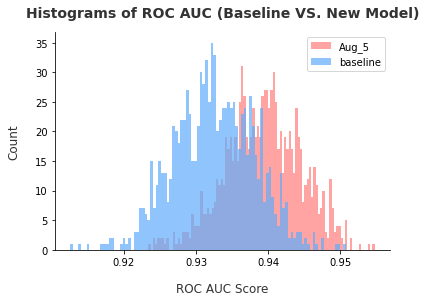

Normal test: 
p_normal value:  0.07379979640245438
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 6.416888161348909
p: 8.66029717560304e-11
************************************************************


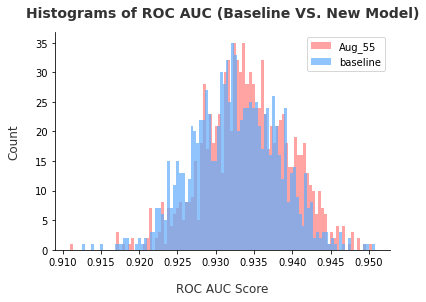

Normal test: 
p_normal value:  0.08416851609945297
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 49.94744009327961
p: 0.0
************************************************************


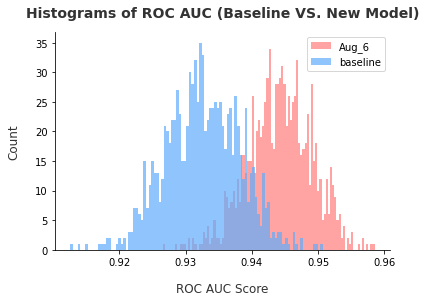

Normal test: 
p_normal value:  0.007908635772764683
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 25.51803856567185
p: 7.968991616135152e-125
************************************************************


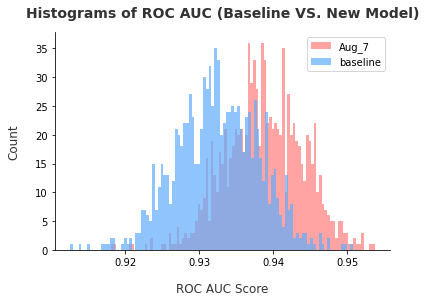

Normal test: 
p_normal value:  0.9002297520637512
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 5.5762401929907695
p: 1.3957919511004726e-08
************************************************************


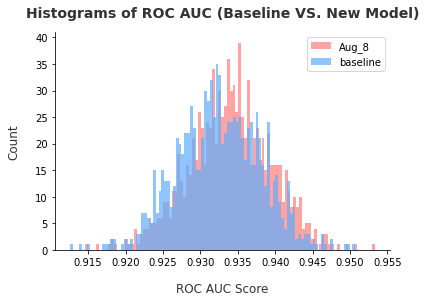

Normal test: 
p_normal value:  0.19626177847385406
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: 17.311528930554164
p: 5.74907302409055e-63
************************************************************


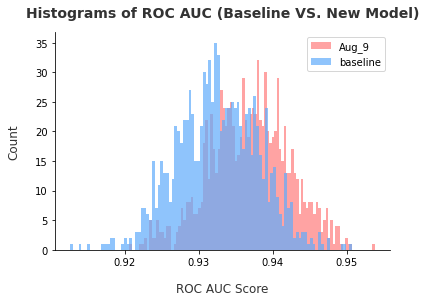

In [8]:
te_best.t_test_auc()

Normal test for baseline model: 
p_normal value:  0.8164581656455994
Normal test: 
p_normal value:  0.7361138463020325
Signficant test of two means: 
t, p value of model baseline compared with model Aug_5
t: 25.576313808252973
p: 2.3784146052019714e-125
************************************************************


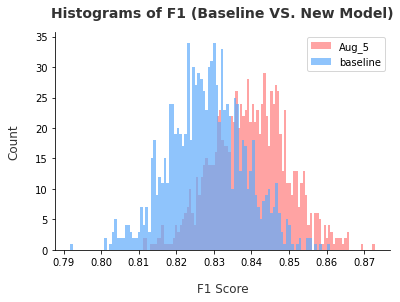

Normal test: 
p_normal value:  0.6288599967956543
Signficant test of two means: 
t, p value of model baseline compared with model Aug_55
t: 12.158424382916563
p: 3.6357834115442826e-33
************************************************************


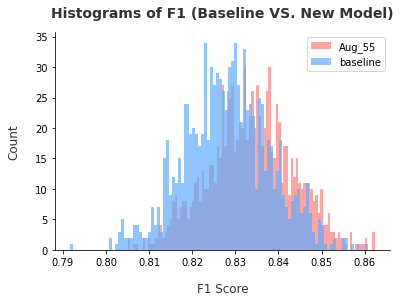

Normal test: 
p_normal value:  0.6222320795059204
Signficant test of two means: 
t, p value of model baseline compared with model Aug_6
t: 40.40413432428963
p: 1.2523494359899357e-261
************************************************************


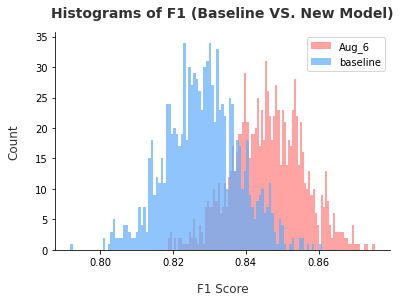

Normal test: 
p_normal value:  0.18996010720729828
Signficant test of two means: 
t, p value of model baseline compared with model Aug_7
t: 26.948092331125178
p: 5.352682082252106e-137
************************************************************


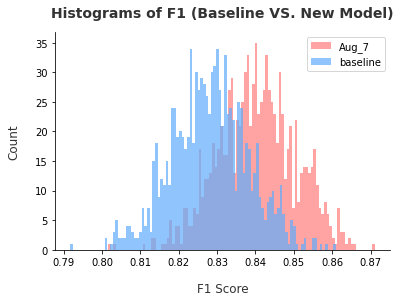

Normal test: 
p_normal value:  0.7680442333221436
Signficant test of two means: 
t, p value of model baseline compared with model Aug_8
t: 17.398303487145878
p: 1.5430878938587026e-63
************************************************************


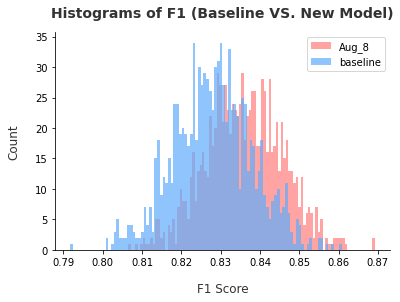

Normal test: 
p_normal value:  0.3122695982456207
Signficant test of two means: 
t, p value of model baseline compared with model Aug_9
t: 13.495252053955367
p: 4.3783490620193885e-40
************************************************************


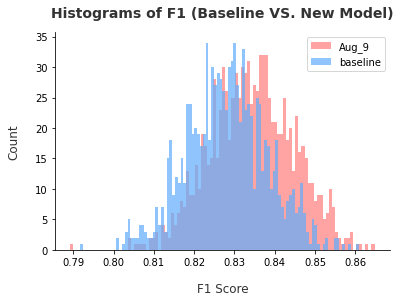

In [9]:
te_best.t_test_f1()

In [10]:
# default threshold = 0.5
default_t_list = [0.5] * 7
te_default = test_evaluations(weight_list, default_t_list, metrics, model_names, results_path, itr, alpha)
te_default.bootstrap()

Number of test patches:  1887
=> loading checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200714-1032_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.413 (1.413)	Loss 0.0291 (0.0291)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.622 (0.694)	Loss 0.0316 (0.0298)	Accuracy 0.688 (0.787)	
Test: [20/59]	Time 0.618 (0.660)	Loss 0.0234 (0.0296)	Accuracy 0.875 (0.807)	
Test: [30/59]	Time 0.630 (0.648)	Loss 0.0297 (0.0346)	Accuracy 0.688 (0.755)	
Test: [40/59]	Time 0.619 (0.641)	Loss 0.0388 (0.0355)	Accuracy 0.906 (0.774)	
Test: [50/59]	Time 0.622 (0.636)	Loss 0.0281 (0.0355)	Accuracy 0.938 (0.805)	
 * Acc 0.820 ROC AUC 0.932
=> loading checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200720-2042_aug_a2b_5_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.263 (1.263)	Loss 0.0241 (0.0241)	Accuracy 0.906 (0.906)	
Test: [10/59]	Time 0.612 (0.677)	Loss 0.0253 (0.0278)	Accuracy 0.844 (0.835)	
Test: [20/59]	Time 0.616 (0.648)	Loss 0.0245 (0.0254)	Accuracy 0.875 (0.866)	
Test: [30/59]	Time 0.617 (0.639)	Loss 0.0205 (0.0291)	Accuracy 0.844 (0.827)	
Test: [40/59]	Time 0.615 (0.633)	Loss 0.0310 (0.0329)	Accuracy 0.938 (0.829)	
Test: [50/59]	Time 0.619 (0.630)	Loss 0.0241 (0.0343)	Accuracy 0.906 (0.841)	
 * Acc 0.849 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200719-1109_aug_a2b_55_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 45)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.820 (1.820)	Loss 0.0251 (0.0251)	Accuracy 0.844 (0.844)	
Test: [10/59]	Time 0.614 (0.725)	Loss 0.0281 (0.0293)	Accuracy 0.750 (0.824)	
Test: [20/59]	Time 0.618 (0.675)	Loss 0.0163 (0.0261)	Accuracy 0.875 (0.841)	
Test: [30/59]	Time 0.620 (0.657)	Loss 0.0236 (0.0290)	Accuracy 0.875 (0.807)	
Test: [40/59]	Time 0.616 (0.647)	Loss 0.0258 (0.0324)	Accuracy 0.938 (0.816)	
Test: [50/59]	Time 0.610 (0.641)	Loss 0.0255 (0.0353)	Accuracy 0.969 (0.837)	
 * Acc 0.845 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200717-1957_aug_a2b_6_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.235 (1.235)	Loss 0.0277 (0.0277)	Accuracy 0.750 (0.750)	
Test: [10/59]	Time 0.621 (0.673)	Loss 0.0231 (0.0252)	Accuracy 0.875 (0.841)	
Test: [20/59]	Time 0.616 (0.646)	Loss 0.0186 (0.0220)	Accuracy 0.875 (0.863)	
Test: [30/59]	Time 0.618 (0.637)	Loss 0.0243 (0.0272)	Accuracy 0.812 (0.811)	
Test: [40/59]	Time 0.609 (0.632)	Loss 0.0310 (0.0308)	Accuracy 0.938 (0.817)	
Test: [50/59]	Time 0.620 (0.629)	Loss 0.0224 (0.0321)	Accuracy 1.000 (0.836)	
 * Acc 0.846 ROC AUC 0.944
=> loading checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200729-2139_aug_a2b_7_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.256 (1.256)	Loss 0.0288 (0.0288)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.619 (0.678)	Loss 0.0281 (0.0301)	Accuracy 0.781 (0.847)	
Test: [20/59]	Time 0.617 (0.649)	Loss 0.0258 (0.0260)	Accuracy 0.844 (0.872)	
Test: [30/59]	Time 0.621 (0.638)	Loss 0.0181 (0.0294)	Accuracy 0.938 (0.844)	
Test: [40/59]	Time 0.613 (0.633)	Loss 0.0211 (0.0316)	Accuracy 0.906 (0.846)	
Test: [50/59]	Time 0.607 (0.630)	Loss 0.0247 (0.0347)	Accuracy 0.938 (0.857)	
 * Acc 0.859 ROC AUC 0.939
=> loading checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200715-1210_aug_a2b_8_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 33)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.208 (1.208)	Loss 0.0300 (0.0300)	Accuracy 0.812 (0.812)	
Test: [10/59]	Time 0.622 (0.671)	Loss 0.0253 (0.0306)	Accuracy 0.719 (0.790)	
Test: [20/59]	Time 0.620 (0.645)	Loss 0.0258 (0.0286)	Accuracy 0.844 (0.830)	
Test: [30/59]	Time 0.624 (0.637)	Loss 0.0227 (0.0330)	Accuracy 0.781 (0.784)	
Test: [40/59]	Time 0.614 (0.632)	Loss 0.0446 (0.0359)	Accuracy 0.906 (0.794)	
Test: [50/59]	Time 0.616 (0.629)	Loss 0.0250 (0.0360)	Accuracy 0.938 (0.821)	
 * Acc 0.832 ROC AUC 0.934
=> loading checkpoint 'classify_01_models/classify_20200730-2156_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar'
=> loaded checkpoint 'classify_01_models/classify_20200730-2156_aug_a2b_9_focal_SGD_lr_0.1_best_auc/model_best.pth.tar' (epoch 31)


/content/gdrive/My Drive/final_files/classification/evaluation.py:347: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_prob = F.softmax(pred)


Test: [0/59]	Time 1.274 (1.274)	Loss 0.0317 (0.0317)	Accuracy 0.688 (0.688)	
Test: [10/59]	Time 0.622 (0.679)	Loss 0.0276 (0.0294)	Accuracy 0.688 (0.781)	
Test: [20/59]	Time 0.615 (0.649)	Loss 0.0179 (0.0251)	Accuracy 0.938 (0.832)	
Test: [30/59]	Time 0.621 (0.639)	Loss 0.0277 (0.0304)	Accuracy 0.750 (0.779)	
Test: [40/59]	Time 0.614 (0.633)	Loss 0.0517 (0.0332)	Accuracy 0.875 (0.791)	
Test: [50/59]	Time 0.614 (0.630)	Loss 0.0267 (0.0343)	Accuracy 0.938 (0.818)	


  0%|          | 2/1000 [00:00<00:56, 17.71it/s]

 * Acc 0.831 ROC AUC 0.937


100%|██████████| 1000/1000 [00:53<00:00, 18.62it/s]

Model:  Baseline
Metric:  sen
*******************
Mean: 0.921
Confidence Interval: [0.901, 0.940]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  spe
*******************
Mean: 0.752
Confidence Interval: [0.728, 0.776]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  auc
*******************
Mean: 0.933
Confidence Interval: [0.922, 0.943]
----------------------------------------------
----------------------------------------------
Model:  Baseline
Metric:  f1
*******************
Mean: 0.804
Confidence Interval: [0.783, 0.824]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  sen
*******************
Mean: 0.896
Confidence Interval: [0.874, 0.916]
----------------------------------------------
----------------------------------------------
Model:  Aug_5
Metric:  spe
*****************